# WALMART BUSINESS CASE

## About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## About the dataset

1.  User_ID: User ID
2.  Product_ID: Product ID
3.  Gender: Sex of User
4.  Age: Age in bins
5.  Occupation: Occupation(Masked)
6.  City_Category: Category of the City (A,B,C)
7.  StayInCurrentCityYears:	Number of years stay in current city
8.  Marital_Status:	Marital Status
9.  ProductCategory: Product Category (Masked)
10. Purchase: Purchase Amount

In [1]:
# Importing required packages to be used

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display

In [42]:
# Importing and Reading top 10 data

df_walmart=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df_walmart.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


## General Analysis

In [3]:
# Defining the shape and dimension of data

a = df_walmart.shape
b = df_walmart.ndim
print("Shape-->", a)
print("Dimension-->",b)

Shape--> (550068, 10)
Dimension--> 2


### Remarks: -
    1. There are 550068 rows and 10 columns present in the dataset.
    2. Its 2-d dataset by nature

In [4]:
# Checking general info of cols

df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### Remarks: -
1. There are 5 string type columns (Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years)
2. Rest all are integer type

In [5]:
# Converting certain cols to string so as to keep it accurate for data analysis
columns=['User_ID','Occupation', 'Marital_Status', 'Product_Category']
df_walmart[columns]=df_walmart[columns].astype('object')

In [6]:
# Overall stats of entire dataset

df_walmart.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [7]:
# Categorical Data Description

df_walmart.describe(include= object).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


### Remarks: -
1. These are the overall stats of the dataset
2. A lot of NaN values are present for numerical related calculation like mean, etc. , since they are object type by nature.
3. There are 5891 unique users, and userid 1001680 being with the highest count.
4. The customers belongs to 21 distinct occupation for the purchases being made and Occupation 4 is the highest w.r.t occurrences.
5. W.r.t Marital status, unmarried contribute more in terms of the count for the purchase.
6. There are 20 unique product categories with 5 being the highest.

In [8]:
# Check on null/empty values
df_walmart.isna().sum().sort_values(ascending=False)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### Remarks: -
1. This is a check on the number of nulls/empty values present in the entire dataset
2. There are no nulls/empty values present in the dataset for any of the column values

In [9]:
# Finding duplicate rows based on all columns

duplicate_rows = df_walmart[df_walmart.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Count the total number of duplicate rows
num_duplicates = len(duplicate_rows)

print(f"Total number of duplicate rows: {num_duplicates}")

Duplicate Rows:
Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category, Purchase]
Index: []
Total number of duplicate rows: 0


### Remarks: -
1. This is solely targetting the number of duplicates across any of the data
2. There are no duplicates present in the entire dataset

In [10]:
# Checking for value ranges (e.g., numeric columns should not have negative values)

numeric_columns = df_walmart.select_dtypes(include=['int', 'float']).columns
value_range_issues = (df_walmart[numeric_columns] < 0).any()

print("\nValue Range Issues:")
print(value_range_issues)


Value Range Issues:
Purchase    False
dtype: bool


### Remarks: -
1. This is for checking if there is any oddity or unexpected data/anomalies present under the integer columns
2. There are no anomaly values and only numeric data is present across all the rows for these integer columns

In [11]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


## Non-Graphical Analysis

### Uniques and Value counts

In [12]:
# Unique values for User_ID

print("Total Unique values are: -")
print(df_walmart['User_ID'].nunique())
print("Unique values are: -")
print(df_walmart['User_ID'].unique())

# Value counts
print("\nValue counts are: -")
print(df_walmart['User_ID'].value_counts().reset_index().to_string(index=False, header=['User_ID', 'Count']))

Total Unique values are: -
5891
Unique values are: -
[1000001 1000002 1000003 ... 1004113 1005391 1001529]

Value counts are: -
User_ID Count
1001680  1026
1004277   979
1001941   898
1001181   862
1000889   823
1003618   767
1001150   752
1001015   740
1005795   729
1005831   727
1002909   718
1001449   714
1002063   709
1004344   705
1003391   698
1003841   698
1000424   694
1004510   691
1001980   685
1001088   680
1004227   676
1003808   671
1004508   651
1000549   632
1003224   622
1003539   617
1005367   612
1001285   606
1004543   588
1003824   584
1001010   575
1004448   575
1005643   573
1000752   572
1001448   570
1003032   568
1004447   560
1000678   559
1004064   558
1001605   558
1000524   558
1005954   557
1000550   549
1001912   549
1003526   547
1004725   544
1002116   538
1003311   537
1003778   533
1001447   533
1003507   530
1001880   529
1000881   527
1004808   524
1001019   517
1006036   514
1006016   504
1003292   502
1004425   501
1000710   500
1005812   499
1004

### Remarks: -
1. There are 5891 unique values for product type in the entire dataset
2. The unique counts of each values are as displayed above:- 1001680 = 1026 times it occurred in the dataset ,etc.

In [13]:
# Unique values for Product_ID

print("Total Unique values are: -")
print(df_walmart['Product_ID'].nunique())
print("Unique values are: -")
print(df_walmart['Product_ID'].unique())

# Value counts
print("\nValue counts are: -")
print(df_walmart['Product_ID'].value_counts().reset_index().to_string(index=False, header=['Product_ID', 'Count']))

Total Unique values are: -
3631
Unique values are: -
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Value counts are: -
Product_ID Count
 P00265242  1880
 P00025442  1615
 P00110742  1612
 P00112142  1562
 P00057642  1470
 P00184942  1440
 P00046742  1438
 P00058042  1422
 P00059442  1406
 P00145042  1406
 P00237542  1394
 P00255842  1383
 P00117942  1364
 P00110942  1360
 P00010742  1350
 P00220442  1282
 P00110842  1281
 P00117442  1260
 P00051442  1249
 P00102642  1246
 P00278642  1226
 P00242742  1215
 P00034742  1212
 P00148642  1204
 P00080342  1203
 P00031042  1200
 P00028842  1197
 P00251242  1187
 P00114942  1178
 P00000142  1152
 P00270942  1152
 P00112542  1131
 P00044442  1111
 P00334242  1093
 P00111142  1015
 P00277642   989
 P00052842   982
 P00116842   979
 P00295942   972
 P00005042   969
 P00003442   968
 P00086442   966
 P00258742   964
 P00085942   963
 P00110542   958
 P00216342   943
 P00073842   936
 P00128942   936
 P00113242   9

### Remarks: -
1. There are 3631 unique values for Age in the entire dataset
2. The unique counts of each values are as displayed above:- P00265242 =>1880 times it occurred in the dataset ,etc.

In [14]:
# Unique values for Gender

print("Total Unique values are: -")
print(df_walmart['Gender'].nunique())
print("Unique values are: -")
print(df_walmart['Gender'].unique())

# Value counts
print("\nValue counts are: -")
print(df_walmart['Gender'].value_counts().reset_index().to_string(index=False, header=['Gender', 'Count']))

Total Unique values are: -
2
Unique values are: -
['F' 'M']

Value counts are: -
Gender  Count
     M 414259
     F 135809


### Remarks: -
1. There are 2 unique values for Gender in the entire dataset
2. The unique counts of each values are as displayed above:- Male =>414259 are there in data ,etc.

In [15]:
# Unique values for Age

print("Total Unique values are: -")
print(df_walmart['Age'].nunique())
print("Unique values are: -")
print(df_walmart['Age'].unique())

# Value counts
print("\nValue counts are: -")
print(df_walmart['Age'].value_counts().reset_index().to_string(index=False, header=['Age', 'Count']))

Total Unique values are: -
7
Unique values are: -
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Value counts are: -
  Age  Count
26-35 219587
36-45 110013
18-25  99660
46-50  45701
51-55  38501
  55+  21504
 0-17  15102


### Remarks: -
1. There are 7 unique values for Age bins in the entire dataset
2. The unique counts of each values are as displayed above:- 219587 people lie in age range of 26-35,etc.

In [16]:
# Unique values for Occupation

print("Total Unique values are: -")
print(df_walmart['Occupation'].nunique())
print("Unique values are: -")
print(df_walmart['Occupation'].unique())

# Value counts
print("\nValue counts are: -")
print(df_walmart['Occupation'].value_counts().reset_index().to_string(index=False, header=['Occupation', 'Count']))

Total Unique values are: -
21
Unique values are: -
[10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]

Value counts are: -
Occupation Count
         4 72308
         0 69638
         7 59133
         1 47426
        17 40043
        20 33562
        12 31179
        14 27309
         2 26588
        16 25371
         6 20355
         3 17650
        10 12930
         5 12177
        15 12165
        11 11586
        19  8461
        13  7728
        18  6622
         9  6291
         8  1546


### Remarks: -
1. There are 21 unique values for Occupation in the entire dataset
2. The unique counts of each values are as displayed above:- Occupation 4 => 72308 people in our data ,etc.

In [17]:
# Unique values for City_Category

print("Total Unique values are: -")
print(df_walmart['City_Category'].nunique())
print("Unique values are: -")
print(df_walmart['City_Category'].unique())

# Value counts
print("\nValue counts are: -")
print(df_walmart['City_Category'].value_counts().reset_index().to_string(index=False, header=['City_Category', 'Count']))

Total Unique values are: -
3
Unique values are: -
['A' 'C' 'B']

Value counts are: -
City_Category  Count
            B 231173
            C 171175
            A 147720


### Remarks: -
1. There are 3 unique values for City categories in the entire dataset
2. The unique counts of each values are as displayed above:- 231173 people belong to city B,etc.

In [18]:
# Unique values for Stay_In_Current_City_Years

print("Total Unique values are: -")
print(df_walmart['Stay_In_Current_City_Years'].nunique())
print("Unique values are: -")
print(df_walmart['Stay_In_Current_City_Years'].unique())

# Value counts
print("\nValue counts are: -")
print(df_walmart['Stay_In_Current_City_Years'].value_counts().reset_index().to_string(index=False, header=['Stay_In_Current_City_Years', 'Count']))

Total Unique values are: -
5
Unique values are: -
['2' '4+' '3' '1' '0']

Value counts are: -
Stay_In_Current_City_Years  Count
                         1 193821
                         2 101838
                         3  95285
                        4+  84726
                         0  74398


### Remarks: -
1. There are 5 unique values for staying in current city in the entire dataset
2. The unique counts of each values are as displayed above:- There are 193821 people who have lived in a particular city for atleast 1 year ,etc.

In [19]:
# Unique values for Marital_Status

print("Total Unique values are: -")
print(df_walmart['Marital_Status'].nunique())
print("Unique values are: -")
print(df_walmart['Marital_Status'].unique())

# Value counts
print("\nValue counts are: -")
print(df_walmart['Marital_Status'].value_counts().reset_index().to_string(index=False, header=['Marital_Status', 'Count']))

Total Unique values are: -
2
Unique values are: -
[0 1]

Value counts are: -
Marital_Status  Count
             0 324731
             1 225337


### Remarks: -
1. There are 2 unique values for MaritalStatus in the entire dataset
2. The unique counts of each values are as displayed above:- Single => 324731 people in our data ,etc.

In [20]:
# Unique values for Product_Category

print("Total Unique values are: -")
print(df_walmart['Product_Category'].nunique())
print("Unique values are: -")
print(df_walmart['Product_Category'].unique())

# Value counts
print("\nValue counts are: -")
print(df_walmart['Product_Category'].value_counts().reset_index().to_string(index=False, header=['Product_Category', 'Count']))

Total Unique values are: -
20
Unique values are: -
[3 1 12 8 5 4 2 6 14 11 13 15 7 16 18 10 17 9 20 19]

Value counts are: -
Product_Category  Count
               5 150933
               1 140378
               8 113925
              11  24287
               2  23864
               6  20466
               3  20213
               4  11753
              16   9828
              15   6290
              13   5549
              10   5125
              12   3947
               7   3721
              18   3125
              20   2550
              19   1603
              14   1523
              17    578
               9    410


### Remarks: -
1. There are 20 unique values for product categories in the entire dataset
2. The unique counts of each values are as displayed above:- 150933 belong to product categoty 5 ,etc.

In [21]:
# Unique values for Purchase

print("Total Unique values are: -")
print(df_walmart['Purchase'].nunique())
print("Unique values are: -")
print(df_walmart['Purchase'].unique())

# Value counts
print("\nValue counts are: -")
print(df_walmart['Purchase'].value_counts().reset_index().to_string(index=False, header=['Purchase', 'Count']))

Total Unique values are: -
18105
Unique values are: -
[ 8370 15200  1422 ...   135   123   613]

Value counts are: -
Purchase Count
    7011   191
    7193   188
    6855   187
    6891   184
    7012   183
    6960   183
    6879   182
    7166   182
    7027   182
    6868   180
    7165   180
    6883   180
    6858   179
    7093   178
    6931   178
    7089   178
    7185   178
    6923   178
    7114   177
    7188   177
    7085   176
    6908   176
    7060   176
    7167   175
    6973   175
    6928   175
    6949   175
    7146   175
    7159   175
    6904   174
    7010   174
    7962   174
    6952   174
    7192   174
    7034   174
    6862   173
    7047   173
    7067   172
    7108   172
    7049   172
    6930   172
    7081   172
    7028   172
    6978   172
    7110   171
    6938   171
    7024   171
    7046   171
    7026   171
    7083   171
    7071   170
    7111   170
    7013   170
    7048   170
    6870   170
    7162   170
    7161   170
    8089   16

### Remarks: -
1. There are 18105 unique values for Purchases in the entire dataset
2. The unique counts of each values are as displayed above:- amount 7011 => 191 people in our data ,etc.

In [22]:
#Checking spread based on distinct users w.r.t their Age

df=df_walmart.groupby(['User_ID'])['Age'].unique()
df.value_counts()/len(df)

[26-35]    0.348498
[36-45]    0.198099
[18-25]    0.181463
[46-50]    0.090137
[51-55]    0.081650
[55+]      0.063147
[0-17]     0.037006
Name: Age, dtype: float64

### Remarks
1. ~35% of the users are aged 26-35. ~20% of users are aged between 36-45, etc.

In [23]:
#Checking spread based on distinct users w.r.t their Marital status

df=df_walmart.groupby(['User_ID'])['Marital_Status'].unique()
df.value_counts()/len(df)

[0]    0.580037
[1]    0.419963
Name: Marital_Status, dtype: float64

### Remarks
1. 58% of the single users and 42% of married users

In [24]:
#Checking the age distribution w.r.t different city-categories
pd.crosstab(index=df_walmart["City_Category"],columns=df_walmart["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


### Remarks

Large percentage of customers aged 26-35 for A(~ 50%) and B (~ 40%) which can be the reason for these city categories to be consisting of actively purchasing customers.

In [25]:
#Checking how genders are contributing towards total purchase-amount

df_pur=pd.DataFrame(df_walmart.groupby(['Gender'])[['Purchase']].sum())

df_pur['percent'] = (df_pur['Purchase']/df_pur['Purchase'].sum()) * 100
df_pur

,Purchase,percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


### Remarks
We can see male(~ 72% of the population) contributes to more than 76% of the total purchase amount whereas female(~ 28% of the population) contributes 23% of the total purchase amount.

In [26]:
#Checking how Marital status are contributing towards total purchase-amount

df_pur=pd.DataFrame(df_walmart.groupby(['Marital_Status'])['Purchase'].sum())

df_pur['percent'] = (df_pur['Purchase']/df_pur['Purchase'].sum()) * 100
df_pur 

,Purchase,percent
Marital_Status,,
0,3008927447,59.047057
1,2086885295,40.952943


### Remarks
Single users are contributing 59% towards the total purchase amount in comparison to 41% by married users.

In [27]:
# Users with highest number of purchases
df_walmart.groupby(['User_ID'])['Purchase'].count().nlargest(10) 

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: Purchase, dtype: int64

In [28]:
#Users with highest purchases amount

df_walmart.groupby(['User_ID'])['Purchase'].sum().nlargest(10)   

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

## Univariate Analysis

### Outlier Checks and Treatment

In [29]:
df_walmart_copy=df_walmart.copy()
df_walmart_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Remarks: -
1. I have created a copy of original data so that while handling outliers, we are not hampering the original data

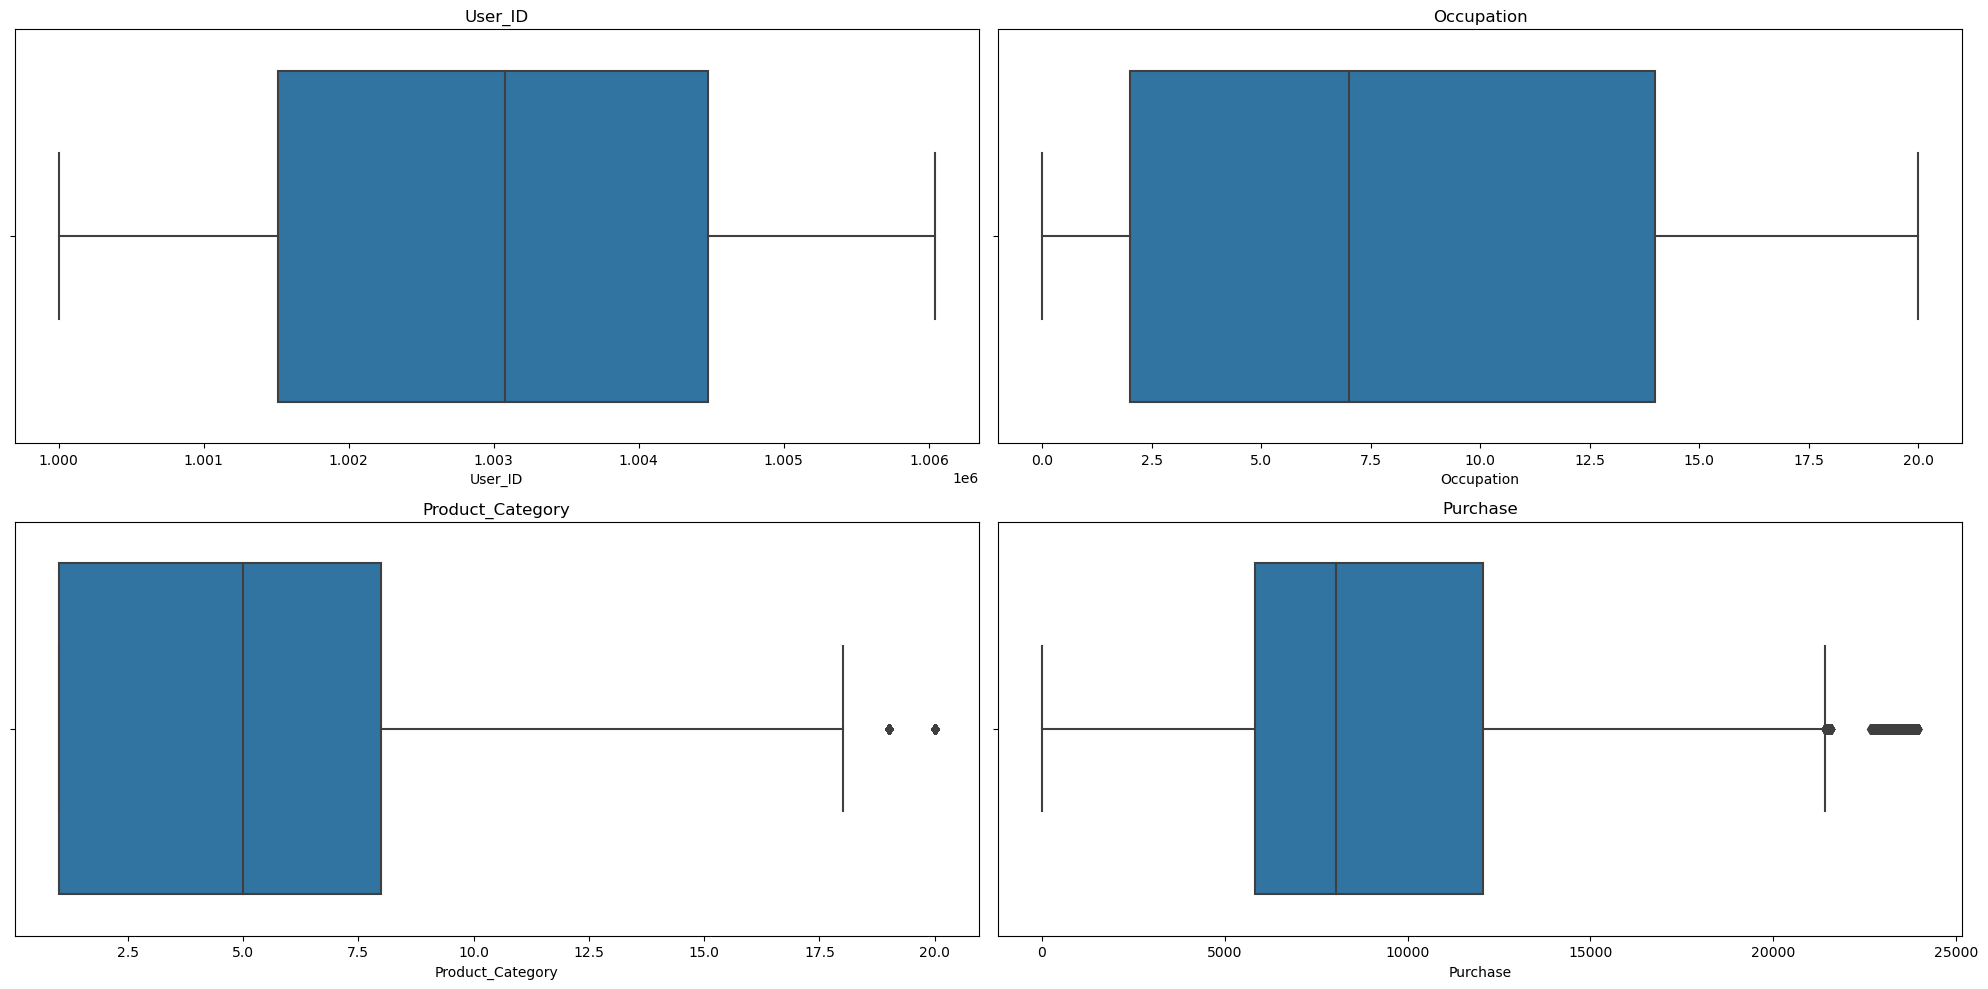

In [30]:
# Checking outliers for certain columns

columns_of_interest = ["User_ID", "Occupation", "Product_Category", "Purchase"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
# Flattening the axes array for easier indexing
axes = axes.flatten()

for i, column in enumerate(columns_of_interest):
    sns.boxplot(data=df_walmart_copy, x=column, orient='h', ax=axes[i])
    axes[i].set_title(f"{column}")

plt.tight_layout()

plt.show()

### Remarks: -
1. There are lots of outliers for Purchase amount especially as compared to other columns

In [31]:
# Checking the percentiles before handling the purchase column outliers

q1=np.percentile(df_walmart_copy['Purchase'],25)
q3=np.percentile(df_walmart_copy['Purchase'],75)
print(f'q1: {q1}')
print(f'q3: {q3}')

q1: 5823.0
q3: 12054.0


In [32]:
# Using winsorization technique to handle the outliers for the Purchase column

Q1 = df_walmart_copy['Purchase'].quantile(0.25)
Q3 = df_walmart_copy['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_walmart_copy = df_walmart_copy[(df_walmart_copy['Purchase'] >= lower_bound) & (df_walmart_copy['Purchase'] <= upper_bound)]

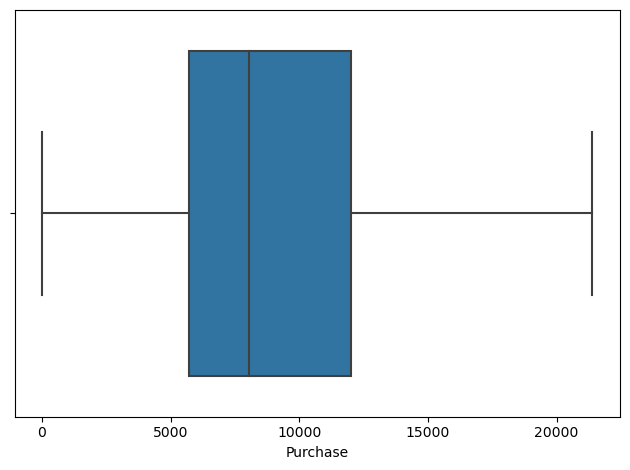

In [33]:
# Checking outliers for Purchase columns

sns.boxplot(data=df_walmart_copy, x=df_walmart_copy['Purchase'], orient='h')
plt.tight_layout()
plt.show()

### Remarks: -
1. To handle the outliers, I have used a technique called "quantile-based flooring and capping"[Winsorization]
2. The outliers are handled to ~ 99% as compared to the initial graphs, and this newly made outlier free dataframe is used
   for below graph analysis

## Graphical analysis

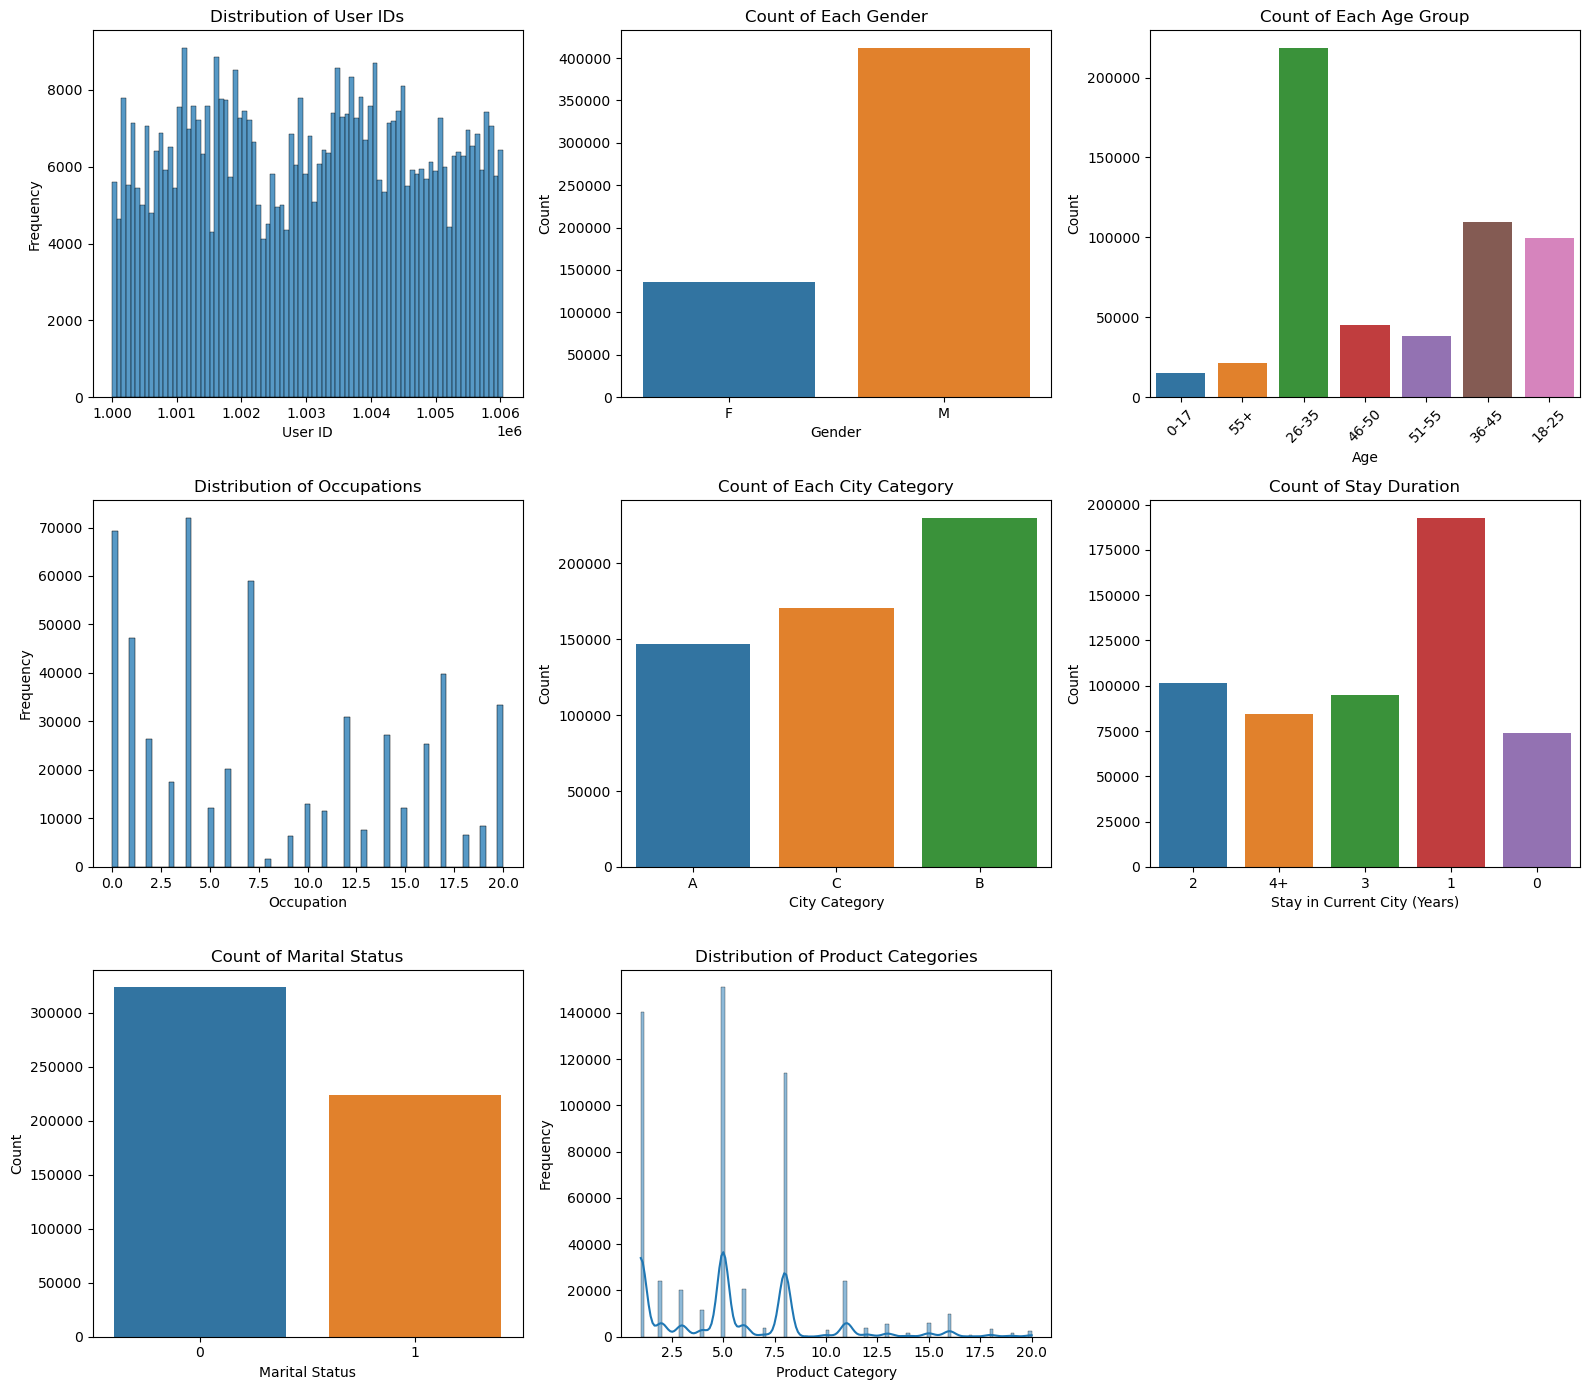

In [34]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14))
fig.subplots_adjust(top=1.2)

# Column: User_ID
sns.histplot(data=df_walmart_copy, x='User_ID', ax=axes[0, 0])
axes[0, 0].set_xlabel('User ID')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of User IDs')

# Column: Gender
sns.countplot(data=df_walmart_copy, x='Gender', ax=axes[0, 1])
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Count of Each Gender')

# Column: Age
sns.countplot(data=df_walmart_copy, x='Age', ax=axes[0, 2])
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Count of Each Age Group')
axes[0, 2].tick_params(axis='x', rotation=45)

# Column: Occupation
sns.histplot(data=df_walmart_copy, x='Occupation', ax=axes[1, 0])
axes[1, 0].set_xlabel('Occupation')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Occupations')

# Column: City_Category
sns.countplot(data=df_walmart_copy, x='City_Category', ax=axes[1, 1])
axes[1, 1].set_xlabel('City Category')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Count of Each City Category')

# Column: Stay_In_Current_City_Years
sns.countplot(data=df_walmart_copy, x='Stay_In_Current_City_Years', ax=axes[1, 2])
axes[1, 2].set_xlabel('Stay in Current City (Years)')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Count of Stay Duration')

# Column: Marital_Status
sns.countplot(data=df_walmart_copy, x='Marital_Status', ax=axes[2, 0])
axes[2, 0].set_xlabel('Marital Status')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Count of Marital Status')

# Column: Product_Category
sns.histplot(data=df_walmart_copy, x='Product_Category',kde=True, ax=axes[2, 1])
axes[2, 1].set_xlabel('Product Category')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('Distribution of Product Categories')

# Remove empty subplot
fig.delaxes(axes[2, 2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Observations: -
    1. Graph 1:- General histplot graph showing the distribution of user Ids.
    2. Graph 2:- The number of Males are higher than the number of Females.
    3. Graph 3:- The Age-group 26-35 is most active followed by 36-45 and so on.
    4. Graph 4:- The occupation category lying around 4 is most active followed by 0, 7 and so on.
    5. Graph 5:- The City B has highest number of customers followed by City C and then finally A.
    6. Graph 6:- The highest stay of a particular customers is 1 year followed by 2 years, etc.
    7. Graph 7:- There are more single customers as compared to married individuals.
    8. Graph 8:- There are 20 product categories with product category 1, 5 and  8 having higher purchasing frequency.

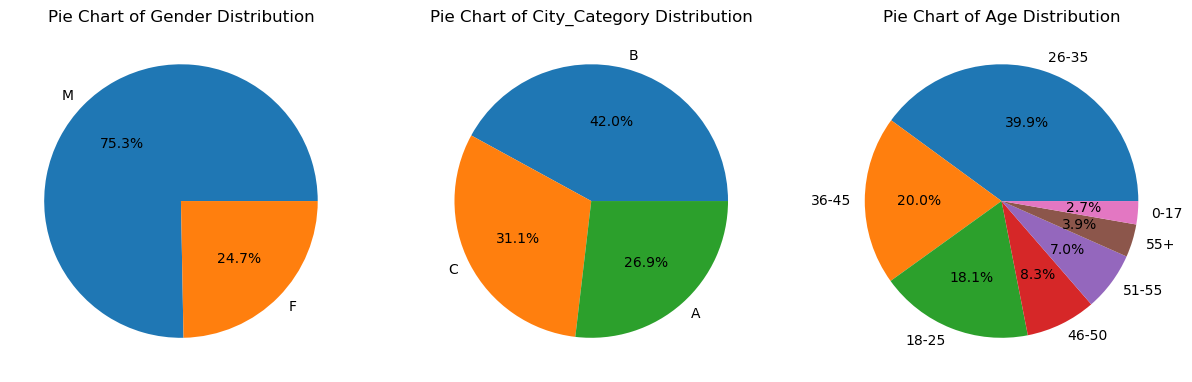

In [35]:
# Plotting the % distributions of only the categorical columns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(top=1.2)

# Plotting Gender
gender_counts = df_walmart_copy["Gender"].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
axes[0].set_title("Pie Chart of Gender Distribution")

# Plotting City_Category
marital_counts = df_walmart_copy["City_Category"].value_counts()
axes[1].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
axes[1].set_title("Pie Chart of City_Category Distribution")

# Plotting Age
marital_counts = df_walmart_copy["Age"].value_counts()
axes[2].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
axes[2].set_title("Pie Chart of Age Distribution")

plt.show()

### Observations: -

    1. Graph 1:- There are almost 75% of males who purchased products and the % count of females tends to 24.7%
    2. Graph 2:- There are 42% customers who belong to City B and so on.
    3. Graph 3:- The highest percentage of customers are 26-35 years of age amounting to ~ 40% of total and so on.

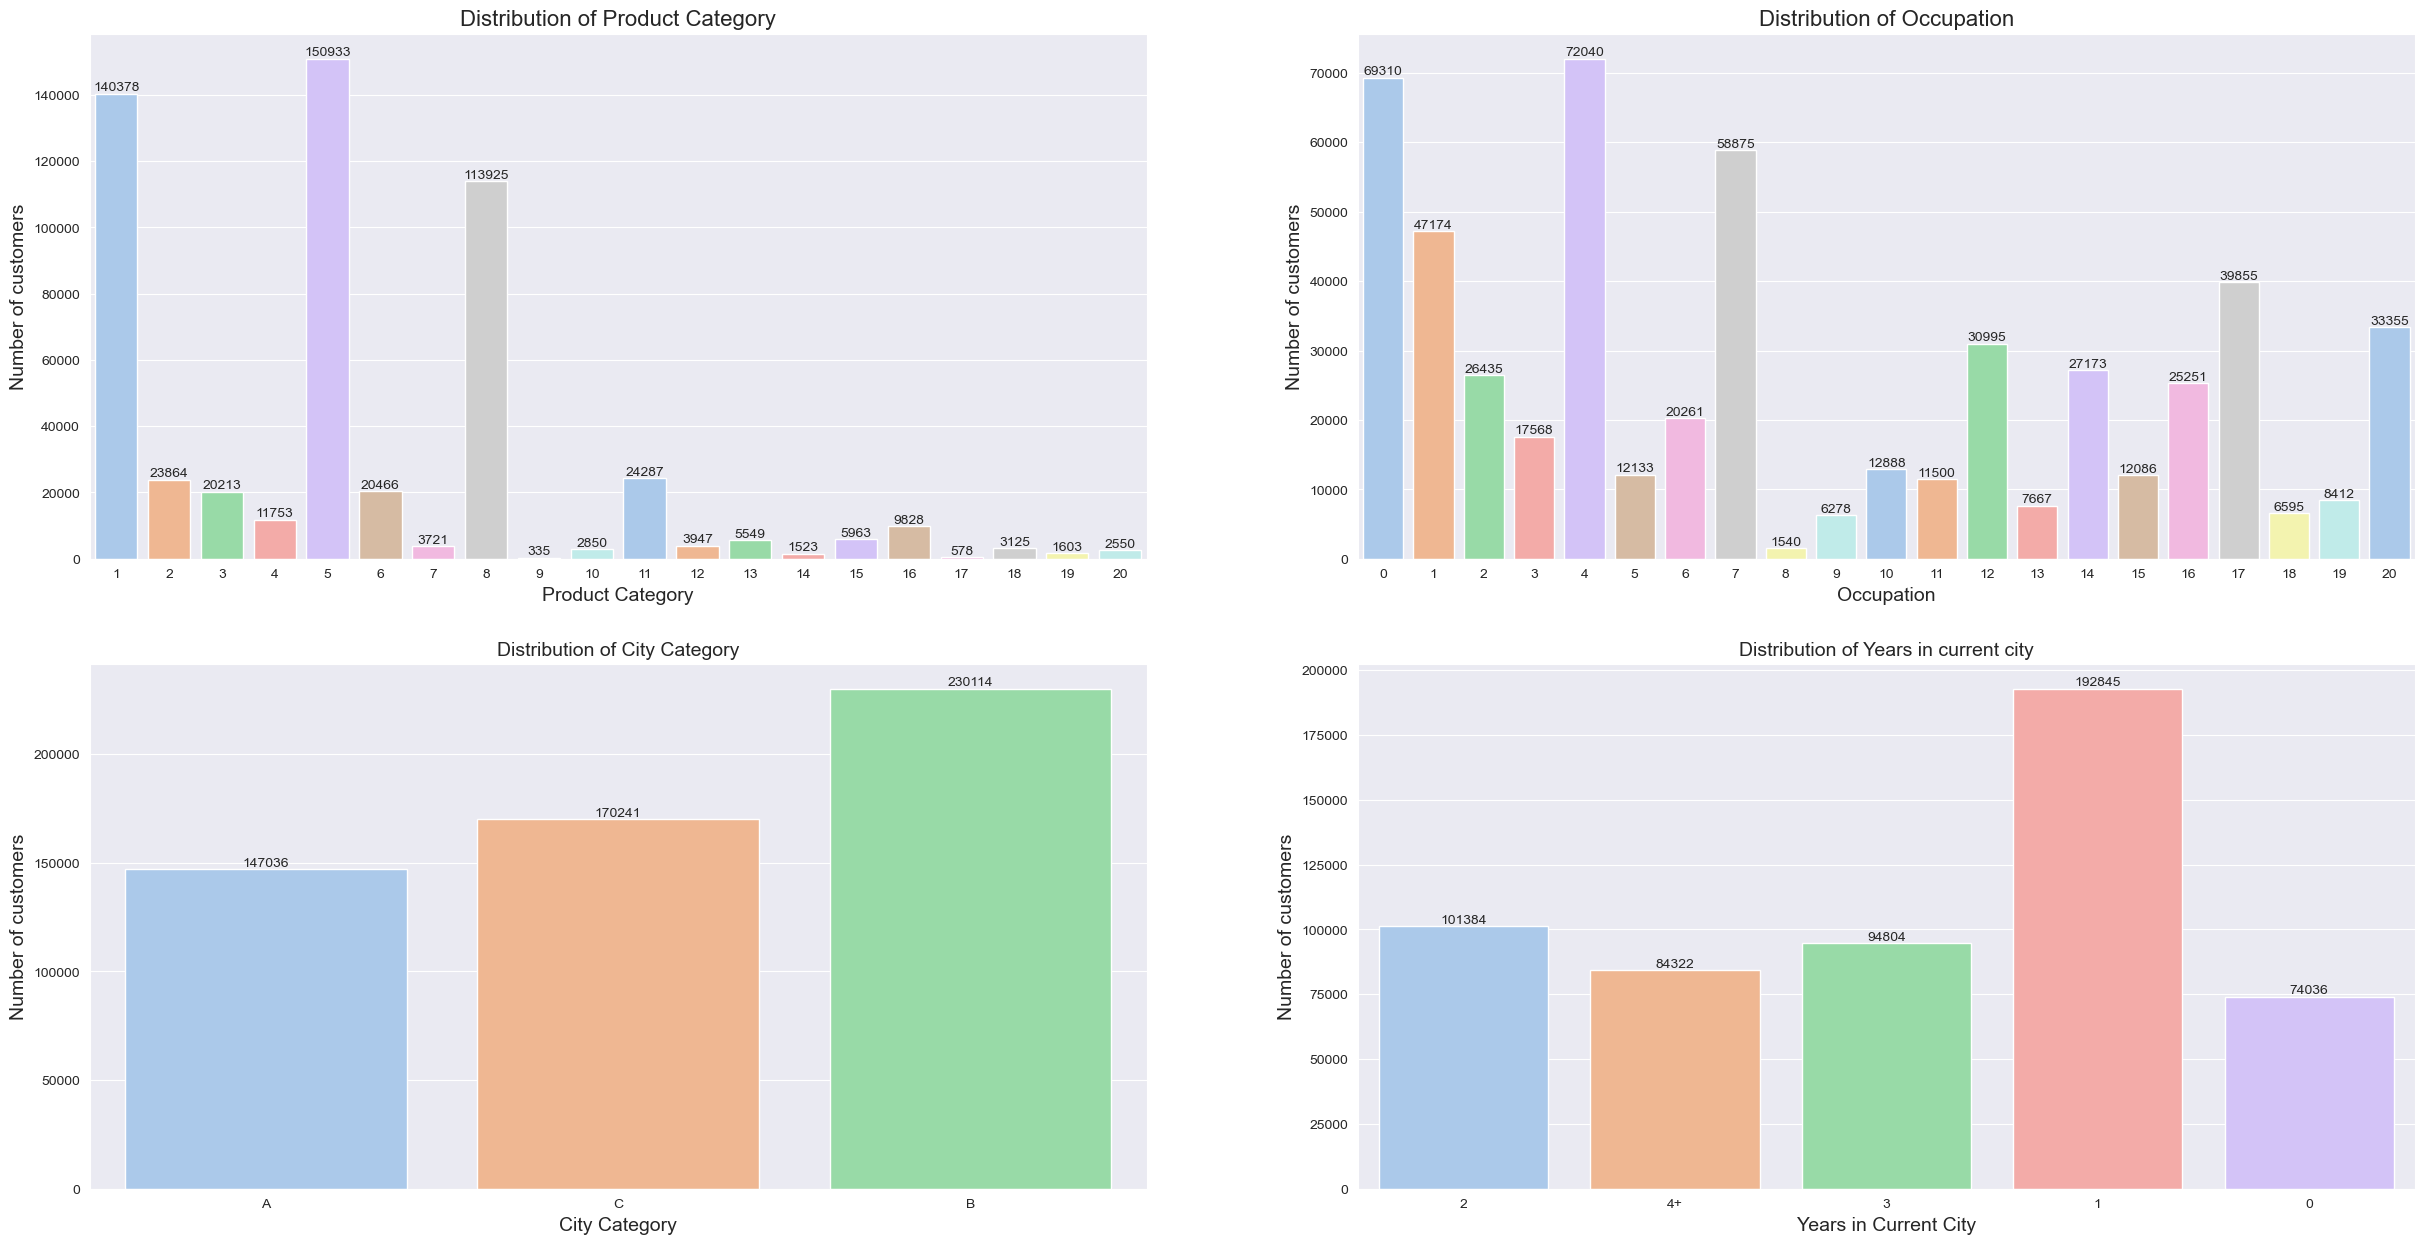

In [36]:
# Plotting different graphs for clearer analysis

sns.set_style('darkgrid')
fig,ax=plt.subplots(2,2,figsize=(30,15))

#count plot for product category
sns.countplot(data=df_walmart_copy,x='Product_Category',palette='pastel',ax=ax[0,0])
ax[0,0].set_xlabel('Product Category',fontdict=dict(fontsize=14))
ax[0,0].set_ylabel('Number of customers',fontdict=dict(fontsize=14))
ax[0,0].bar_label(ax[0,0].containers[0])
ax[0,0].set_title('Distribution of Product Category',fontdict=dict(fontsize=16))

#count plot for Occupation
sns.countplot(data=df_walmart_copy,x='Occupation',palette='pastel',ax=ax[0,1])
ax[0,1].set_xlabel('Occupation',fontdict=dict(fontsize=14))
ax[0,1].set_ylabel('Number of customers',fontdict=dict(fontsize=14))
ax[0,1].bar_label(ax[0,1].containers[0])
ax[0,1].set_title('Distribution of Occupation',fontdict=dict(fontsize=16))


#countplot for city category
sns.countplot(data=df_walmart_copy,x='City_Category',palette='pastel',ax=ax[1,0])
ax[1,0].set_xlabel('City Category',fontdict=dict(fontsize=14))
ax[1,0].set_ylabel('Number of customers',fontdict=dict(fontsize=14))
ax[1,0].bar_label(ax[1,0].containers[0])
ax[1,0].set_title('Distribution of City Category',fontdict=dict(fontsize=14))


#countplot for years in current city
sns.countplot(data=df_walmart_copy,x='Stay_In_Current_City_Years',palette='pastel',ax=ax[1,1])
ax[1,1].set_xlabel('Years in Current City',fontdict=dict(fontsize=14))
ax[1,1].set_ylabel('Number of customers',fontdict=dict(fontsize=14))
ax[1,1].bar_label(ax[1,1].containers[0])
ax[1,1].set_title('Distribution of Years in current city',fontdict=dict(fontsize=14))
plt.show()

### Observations: -

    1. Graph 1:- Among Walmart customers, a notable 27.4% exhibit a preference for purchasing items within product category 5. On the other hand, product category 9 experiences the least popularity, with only a minimal 0.07% of customers expressing a preference for it.
    2. Graph 2:- The majority of customers fall under Occupation category4
    3. Graph 3:- Walmart customers are distributed across different city categories: 42.03% belong to category B, 31.12% belong to category C, and the remaining 27% belong to category A.
    4. Graph 4:- The majority of customers reside in a single city for a duration of one year.

## Bivariate Analysis

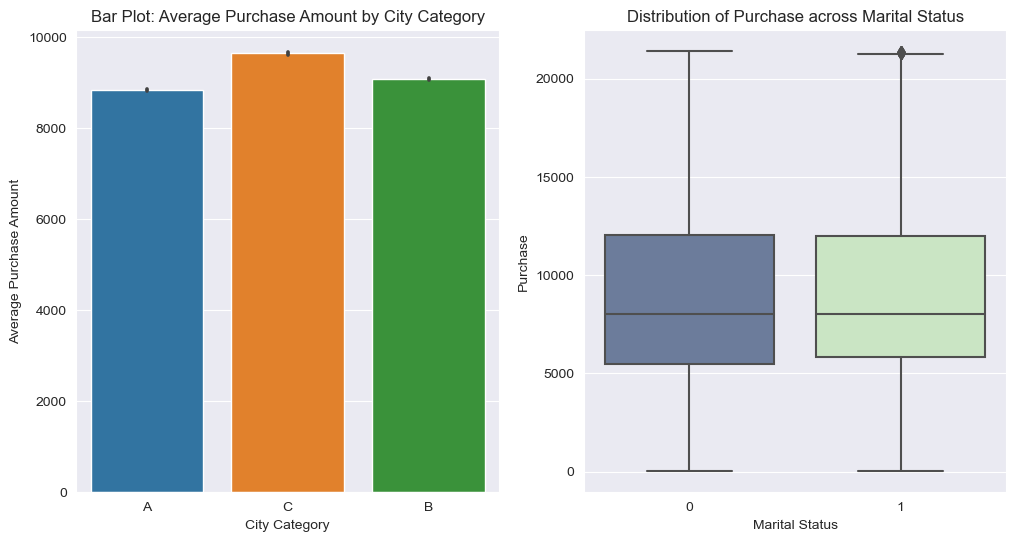

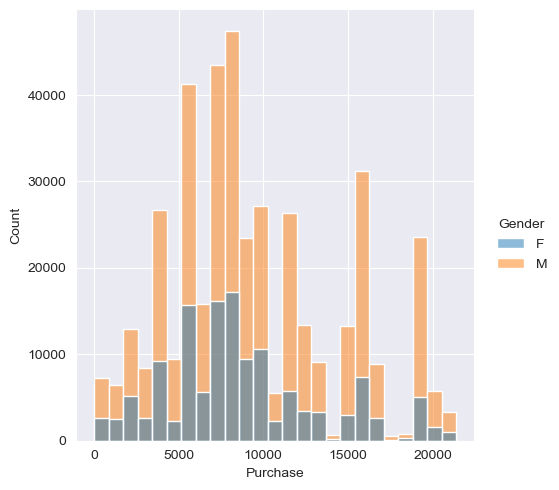

In [37]:
# Bivariate analysis basing "Purchase" column as base

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.barplot(data=df_walmart_copy, x='City_Category', y='Purchase',ax=axes[0])
axes[0].set_xlabel('City Category')
axes[0].set_ylabel('Average Purchase Amount')
axes[0].set_title('Bar Plot: Average Purchase Amount by City Category')

sns.boxplot(data=df_walmart_copy,x='Marital_Status',y='Purchase',palette=["#647AA3","#C6EBBE"],ax=axes[1])
axes[1].set_title("Distribution of Purchase across Marital Status")
axes[1].set_xlabel('Marital Status')

sns.displot( x='Purchase', data=df_walmart_copy, hue='Gender', bins=25)
plt.show()

### Observations: -

1. Graph 1:- The average purchase amount for City C is higher followed by city B and then A. It seems that even though City C has less people than B, but purchasing power is more compared to others.
2. Graph 2:- The distribution of purchase w.r.t marital status is higher for singles but the median of both categories fall around 7k.
3. Graph 3:- The purchasing power of males is higher than females and also the average purchase amount of males are above ~ 15k whereas as that of females is below ~ 15k.

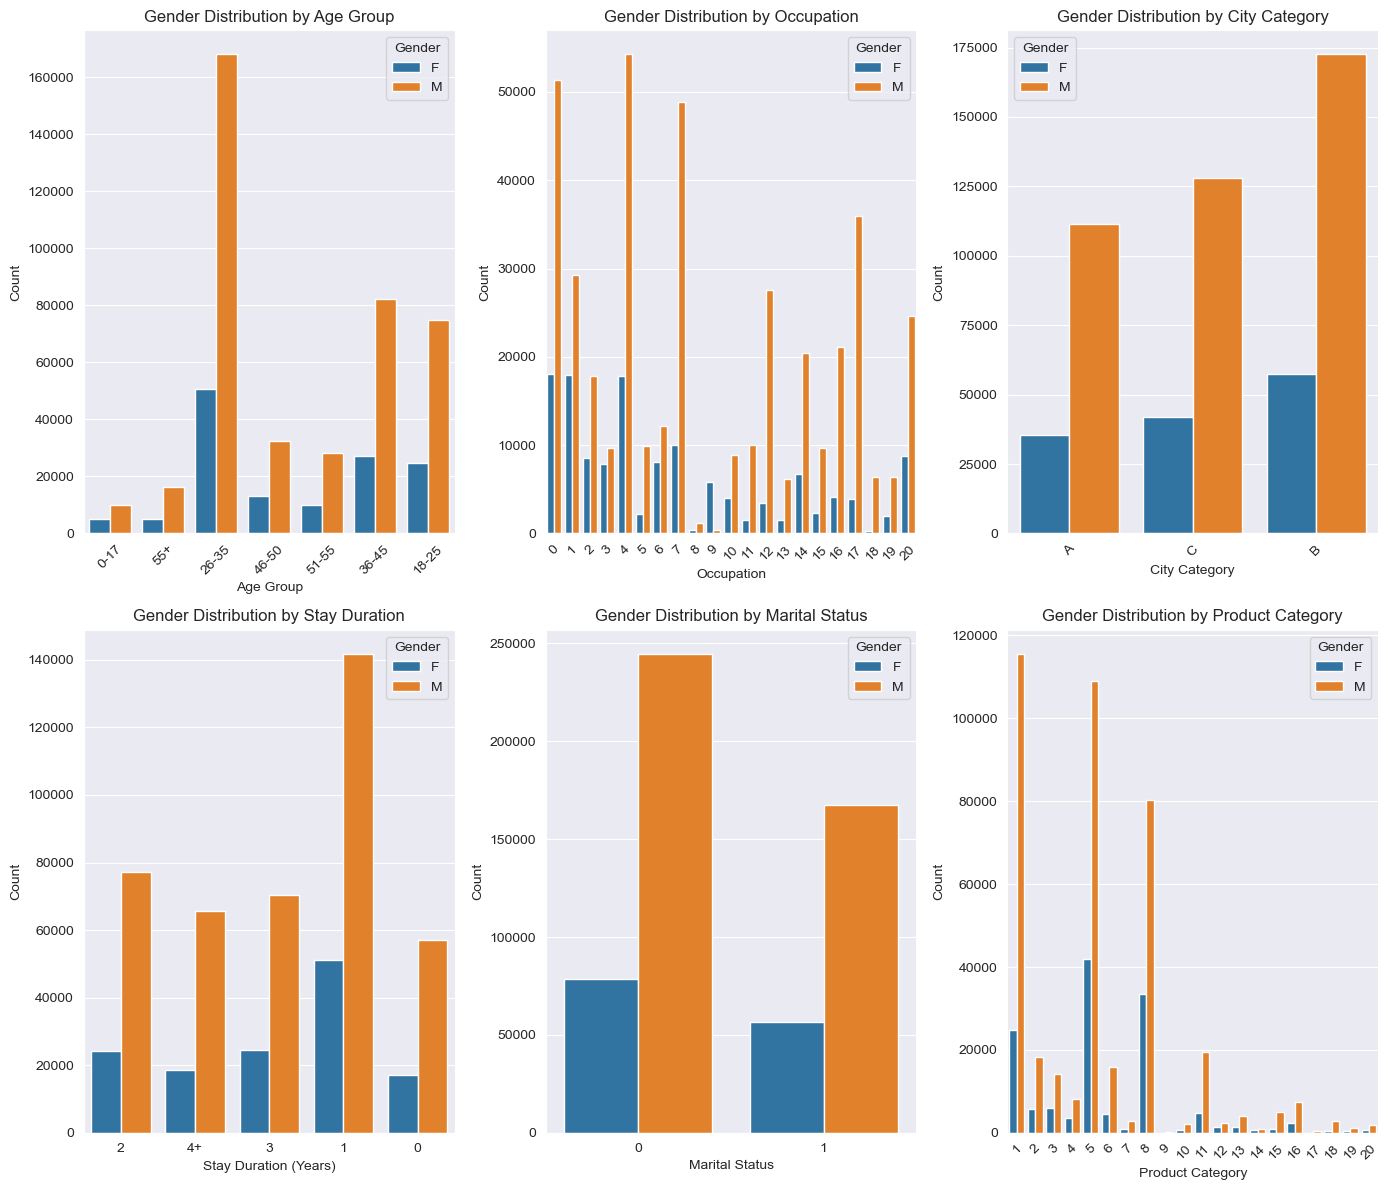

In [38]:
# Bivariate analysis basing "Gender" column as base

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 12))
fig.subplots_adjust(top=1.2)

# Gender vs Age
sns.countplot(data=df_walmart_copy, x='Age', hue='Gender', ax=axes[0, 0])
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Gender Distribution by Age Group')
axes[0, 0].tick_params(axis='x', rotation=45)

# Column: Gender vs Occupation
sns.countplot(data=df_walmart_copy, x='Occupation', hue='Gender', ax=axes[0, 1])
axes[0, 1].set_xlabel('Occupation')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Gender Distribution by Occupation')
axes[0, 1].tick_params(axis='x', rotation=45)

# Column: Gender vs City_Category
sns.countplot(data=df_walmart_copy, x='City_Category', hue='Gender', ax=axes[0, 2])
axes[0, 2].set_xlabel('City Category')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Gender Distribution by City Category')
axes[0, 2].tick_params(axis='x', rotation=45)

# Column: Gender vs Stay_In_Current_City_Years
sns.countplot(data=df_walmart_copy, x='Stay_In_Current_City_Years', hue='Gender', ax=axes[1, 0])
axes[1, 0].set_xlabel('Stay Duration (Years)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Gender Distribution by Stay Duration')

# Column: Gender vs Marital_Status
sns.countplot(data=df_walmart_copy, x='Marital_Status', hue='Gender', ax=axes[1, 1])
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Gender Distribution by Marital Status')

# Column: Gender vs Product_Category
sns.countplot(data=df_walmart_copy, x='Product_Category', hue='Gender', ax=axes[1, 2])
axes[1, 2].set_xlabel('Product Category')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Gender Distribution by Product Category')
axes[1, 2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Observations: -

1. Graph 1:- The Males are highest in age range 26-35 (>160k) followed by age range of 36-45(~ = 80k). Also the females are higher in 26-35 range (~ 50k)
2. Graph 2:- The occupation (4) of male is the highest followed by occupation (0). W.r.t Females, the occupation (0) is higher.
3. Graph 3:- The City B which carried highest population has more males compared to females and this trend holds equal for other 2 cities.
4. Graph 4:- The Stay duration (1) which was highest has more males compared to females
5. Graph 5:- More single males made a purchase as compared to females (single/married).
6. Graph 6:- More males are there for product category of 1 followed by 5 and so on.

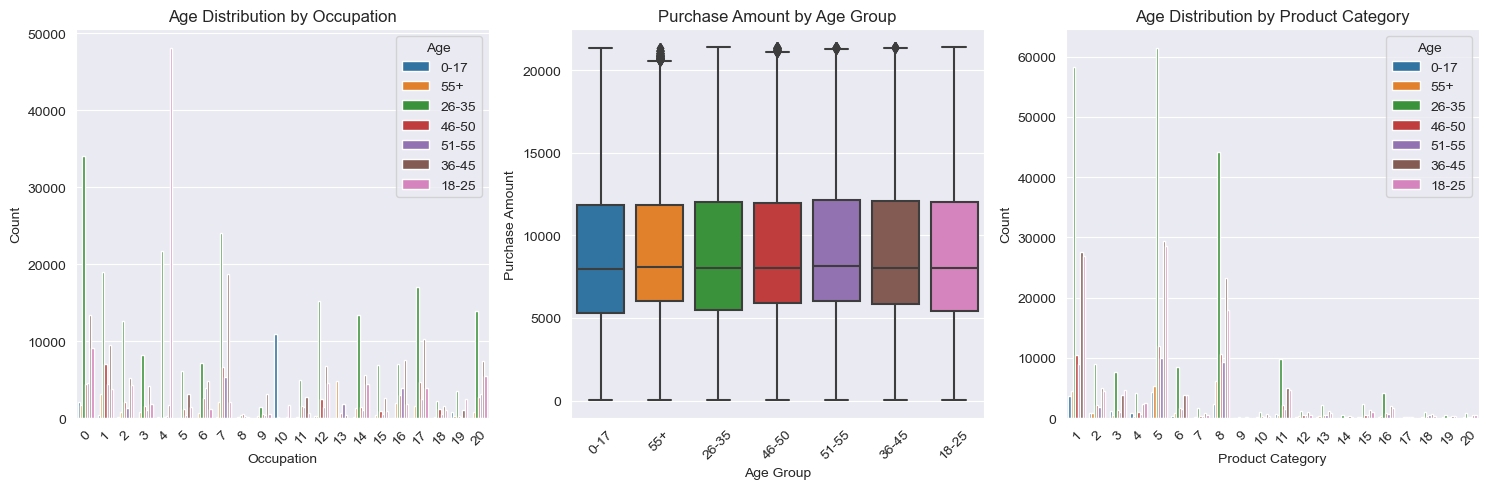

In [39]:
# Few more bivariate analysis

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(top=1.2)

# Age vs Occupation
sns.countplot(data=df_walmart_copy, x='Occupation', hue='Age', ax=axes[0]) 
axes[0].set_xlabel('Occupation')                                                
axes[0].set_ylabel('Count')                                                     
axes[0].set_title('Age Distribution by Occupation')                             
axes[0].tick_params(axis='x',rotation=45)                                                 

# Age vs Purchase
sns.boxplot(data=df_walmart_copy, x='Age', y='Purchase', ax=axes[1])
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Purchase Amount')
axes[1].set_title('Purchase Amount by Age Group')
axes[1].tick_params(axis='x',rotation=45)

# Age vs Product_Category
sns.countplot(data=df_walmart_copy, x='Product_Category', hue='Age', ax=axes[2])
axes[2].set_xlabel('Product Category')
axes[2].set_ylabel('Count')
axes[2].set_title('Age Distribution by Product Category')
axes[2].tick_params(axis='x',rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Observations: -

1. Graph 1:- More people have occupation as 4 who belonged to the age range of 18-25 followed by 0ccupation 0 for age range of 26-35 and so on.
2. Graph 2:- The median for all age groups are nearly similar to each other. Also age range >55 have more outliers compared to other age groups w.r.t purchasing pattern.
3. Graph 3:- People with age range 26-35 are highest in product category of 5 followed by product category of 1 for same age range.

## Multivariate Analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_8040\16590256.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_walmart.corr(), annot=True, cmap="viridis", linewidth=.5)


<Axes: >

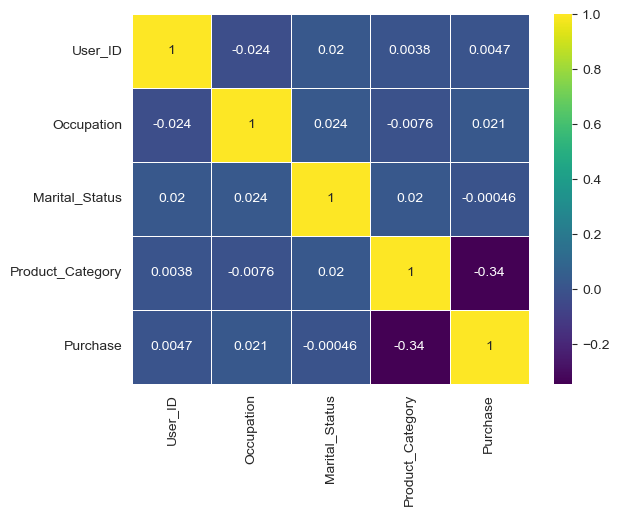

In [43]:
sns.heatmap(df_walmart.corr(), annot=True, cmap="viridis", linewidth=.5)

### Observations: -

From the above correlation plot, we can see the correlation is not significant between any pair of variables.

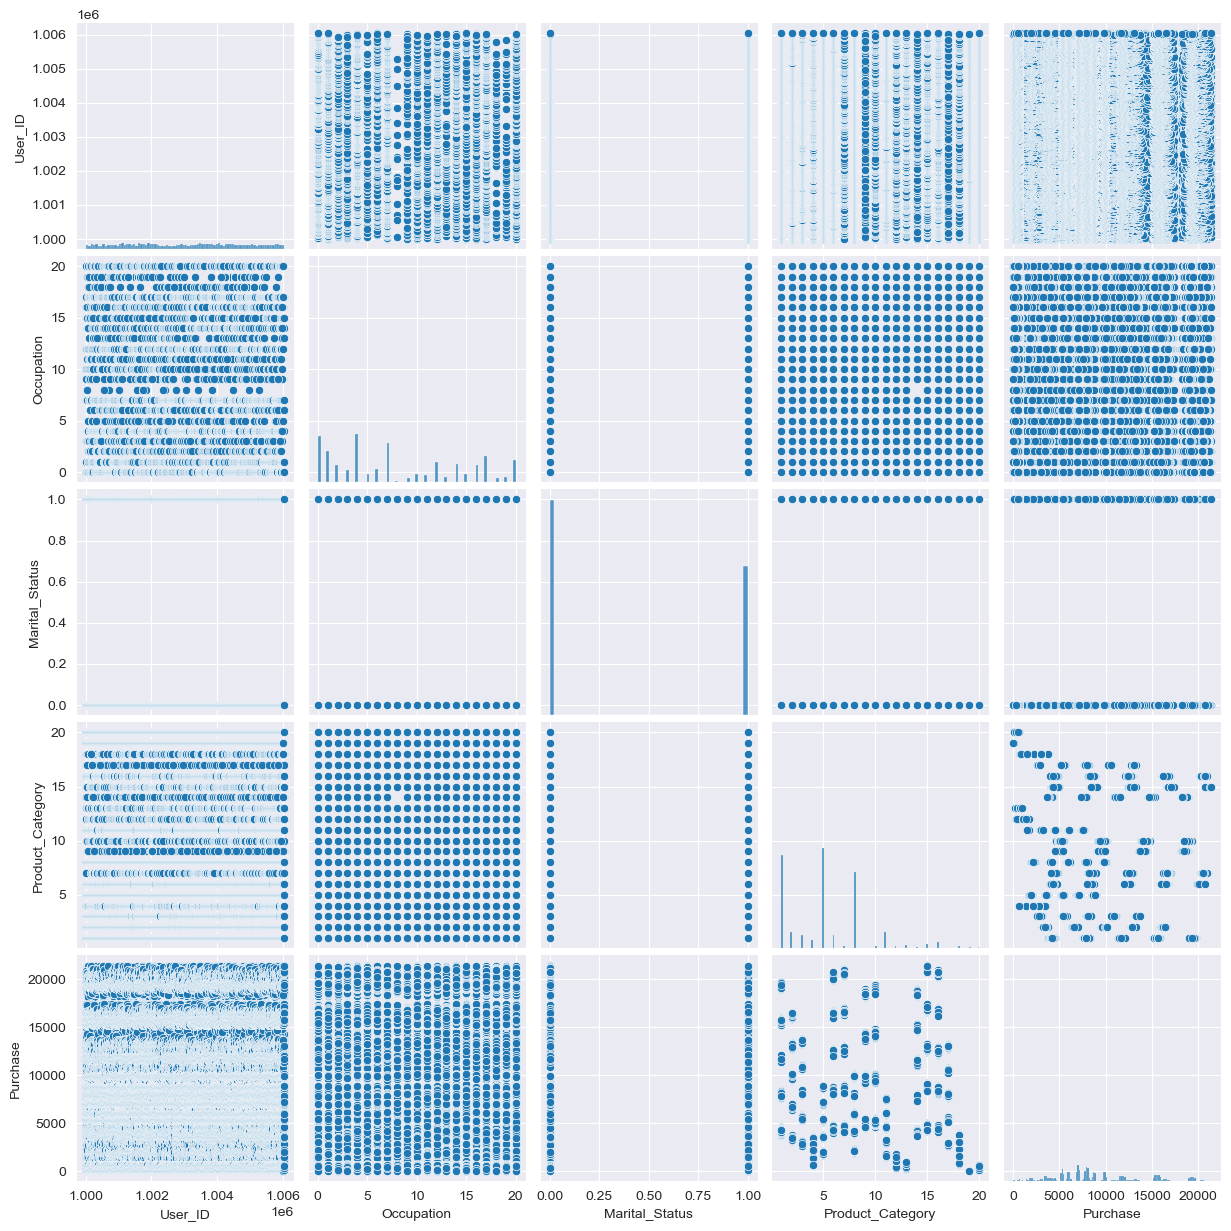

In [41]:
sns.pairplot(df_walmart_copy)

## Central Limit Theorem

#### Q1. Are women spending more money per transaction than men? Why or Why not?

In [44]:
df_walmart_copy.groupby(['Gender'])['Purchase'].describe()
df_trans = df_walmart_copy.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
df_trans = df_trans.reset_index()
df_trans.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [45]:
# Gender wise value counts in avg_amt_df
df_trans['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

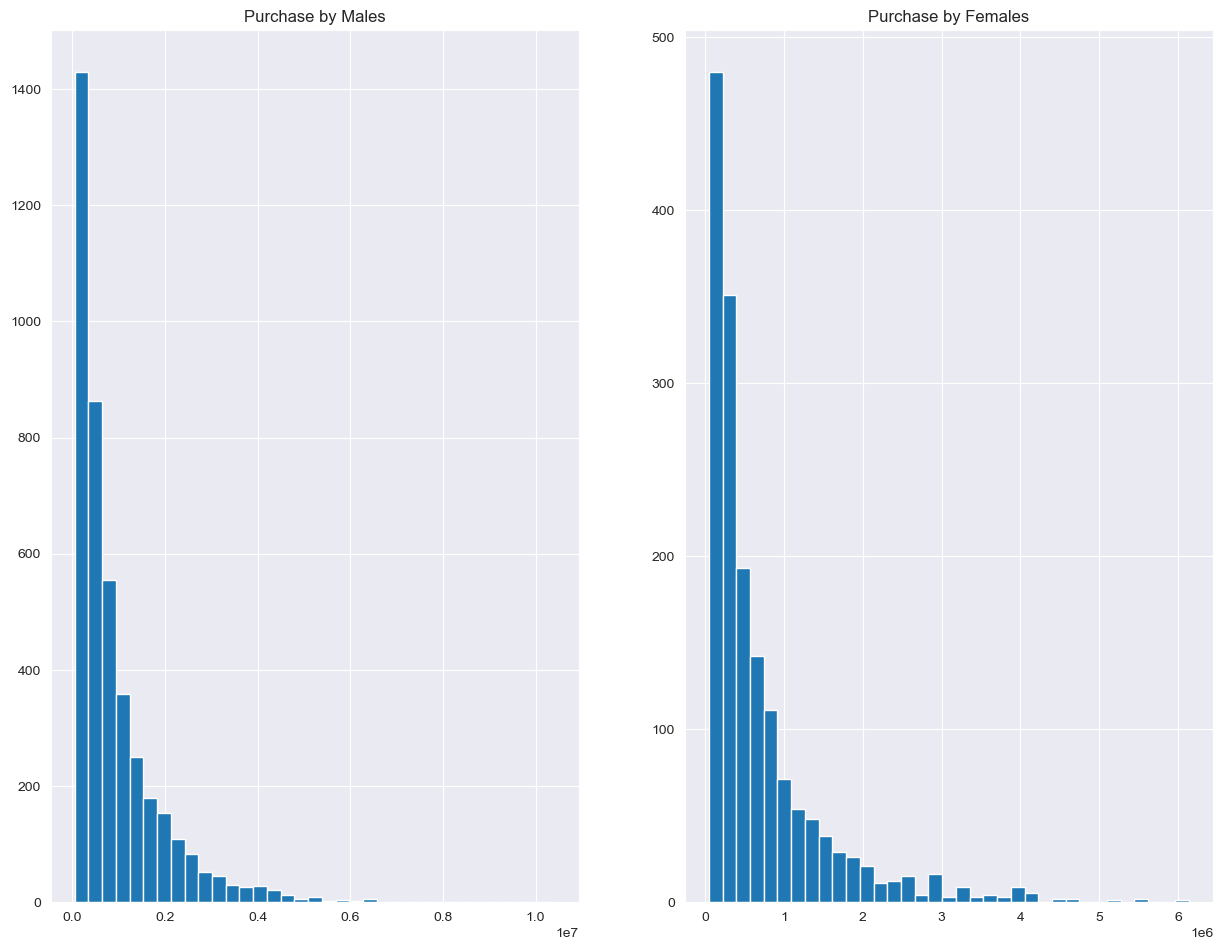

In [47]:
# Graph of average amount spend for each customer based on Gender

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
fig.subplots_adjust(top=1.2)

df_trans[df_trans['Gender']=='M']['Purchase'].hist(bins=35, ax=axes[0])
axes[0].set_title('Purchase by Males')

df_trans[df_trans['Gender']=='F']['Purchase'].hist(bins=35, ax=axes[1])
axes[1].set_title('Purchase by Females')

plt.show()

In [49]:
# Calculating average amount based on Gender

fem_avgtrns = df_trans[df_trans['Gender']=='F']['Purchase'].mean()
male_avgtrns = df_trans[df_trans['Gender']=='M']['Purchase'].mean()


print("Average amount spend by Male customers: {:.2f}".format(male_avgtrns))
print("Average amount spend by Female customers: {:.2f}".format(fem_avgtrns))

Average amount spend by Male customers: 913870.84
Average amount spend by Female customers: 703781.06


### Observations: -

It can be concluded that Male customers spend more money than female customers in terms of purchasing power

#### Q2. Confidence intervals and distribution of the mean of the expenses by female and male customers

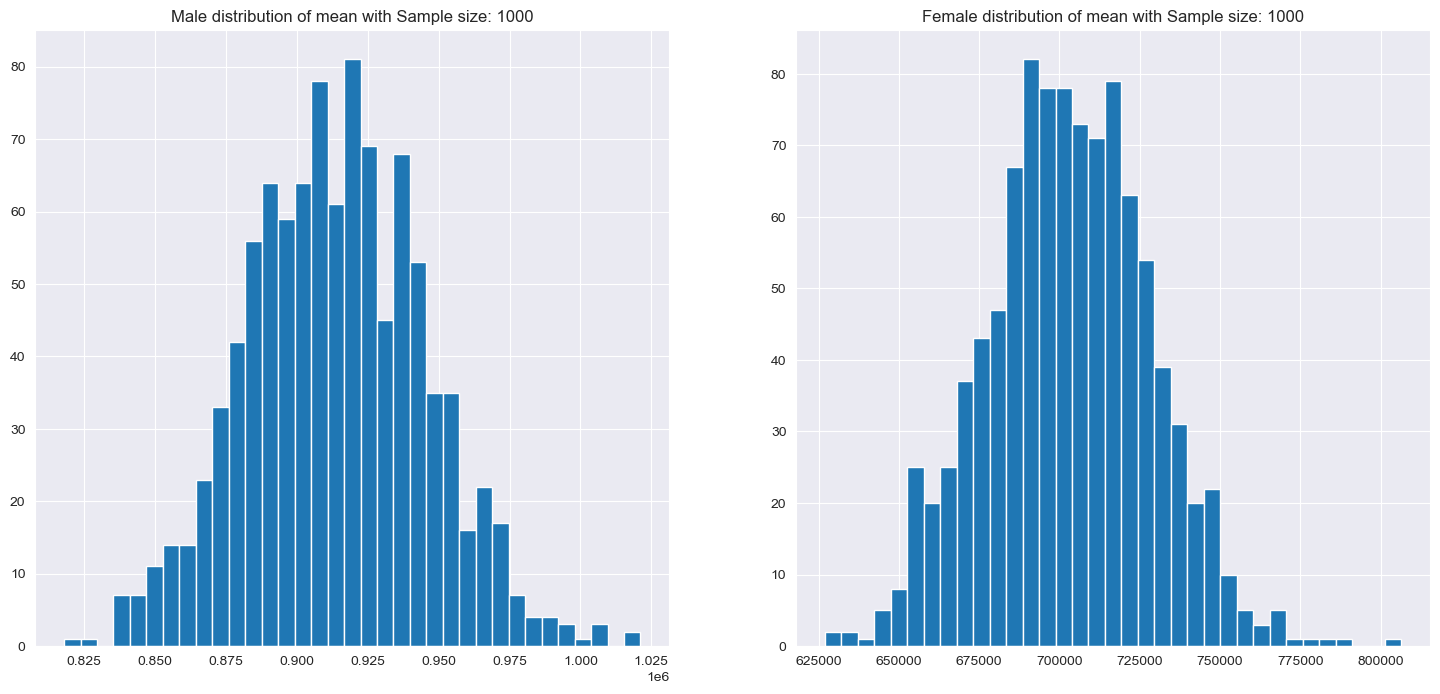

In [50]:
avg_male = df_trans[df_trans['Gender']=='M']
avg_female = df_trans[df_trans['Gender']=='F']

#Finding the sample(sample size=1000) for average purchase amount for males and females 
genders = ["M", "F"]

sample_size = 1000

num_rep = 1000
male_mean = []
female_mean = []

for i in range(num_rep):
    male_mean1 = avg_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean1 = avg_female.sample(sample_size, replace=True)['Purchase'].mean()
    
    male_mean.append(male_mean1)
    female_mean.append(female_mean1)
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

axis[0].hist(male_mean, bins=35)
axis[1].hist(female_mean, bins=35)
axis[0].set_title("Male distribution of mean with Sample size: 1000")
axis[1].set_title("Female distribution of mean with Sample size: 1000")

plt.show()

### Observations

The mean sample seems to be normally distributed for both males and females. Also, the mean of the sample means are closer to the population mean as per CLT

### Calculating 90% confidence interval for sample size 1000

In [53]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male:- {:.2f}".format(avg_male['Purchase'].mean()))
print("Population avg spend amount for Female:- {:.2f}\n".format(avg_female['Purchase'].mean()))

print("Sample avg spend amount for Male:- {:.2f}".format(np.mean(male_mean)))
print("Sample avg spend amount for Female:- {:.2f}\n".format(np.mean(female_mean)))

print("Sample std for Male:- {:.2f}".format(pd.Series(male_mean).std()))
print("Sample std for Female:- {:.2f}\n".format(pd.Series(female_mean).std()))

print("Sample std error for Male:- {:.2f}".format(pd.Series(male_mean).std()/np.sqrt(1000))) 
print("Sample std error for Female:- {:.2f}\n".format(pd.Series(female_mean).std()/np.sqrt(1000)))

sample_means_male=np.mean(male_mean)
sample_means_female=np.mean(female_mean)

sample_stddev_male=pd.Series(male_mean).std()
sample_stddev_female=pd.Series(female_mean).std()

sample_stderr_male=sample_stddev_male/np.sqrt(1000)
sample_stderr_female=sample_stddev_female/np.sqrt(1000)

Upper_Limit_male=z90*sample_stderr_male + sample_means_male
Lower_Limit_male=sample_means_male - z90*sample_stderr_male

Upper_Limit_female=z90*sample_stderr_female + sample_means_female
Lower_Limit_female=sample_means_female - z90*sample_stderr_female

print("CI w.r.t Male:- ",[Lower_Limit_male,Upper_Limit_male])
print("CI w.r.t Female:- ",[Lower_Limit_female,Upper_Limit_female])


Population avg spend amount for Male:- 913870.84
Population avg spend amount for Female:- 703781.06

Sample avg spend amount for Male:- 913603.31
Sample avg spend amount for Female:- 702868.29

Sample std for Male:- 31524.70
Sample std for Female:- 25422.22

Sample std error for Male:- 996.90
Sample std error for Female:- 803.92

CI w.r.t Male:-  [911963.4109522441, 915243.206987756]
CI w.r.t Female:-  [701545.8366943554, 704190.7369616448]


### Observations

Using Confidence interval at 90%, it can be inferred that:

1. Average amount spend by male customers lie in the range 911963.4 - 915243.2

2. Average amount spend by female customers lie in range 701545.8 - 704190.7

### Calculating 95% confidence interval for sample size 1000

In [54]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male:- {:.2f}".format(avg_male['Purchase'].mean()))
print("Population avg spend amount for Female:- {:.2f}\n".format(avg_female['Purchase'].mean()))

print("Sample avg spend amount for Male:- {:.2f}".format(np.mean(male_mean)))
print("Sample avg spend amount for Female:- {:.2f}\n".format(np.mean(female_mean)))

print("Sample std for Male:- {:.2f}".format(pd.Series(male_mean).std()))
print("Sample std for Female:- {:.2f}\n".format(pd.Series(female_mean).std()))

print("Sample std error for Male:- {:.2f}".format(pd.Series(male_mean).std()/np.sqrt(1000))) 
print("Sample std error for Female:- {:.2f}\n".format(pd.Series(female_mean).std()/np.sqrt(1000)))

sample_means_male=np.mean(male_mean)
sample_means_female=np.mean(female_mean)

sample_stddev_male=pd.Series(male_mean).std()
sample_stddev_female=pd.Series(female_mean).std()

sample_stderr_male=sample_stddev_male/np.sqrt(1000)
sample_stderr_female=sample_stddev_female/np.sqrt(1000)

Upper_Limit_male=z95*sample_stderr_male + sample_means_male
Lower_Limit_male=sample_means_male - z95*sample_stderr_male

Upper_Limit_female=z95*sample_stderr_female + sample_means_female
Lower_Limit_female=sample_means_female - z95*sample_stderr_female

print("CI w.r.t Male:- ",[Lower_Limit_male,Upper_Limit_male])
print("CI w.r.t Female:- ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male:- 913870.84
Population avg spend amount for Female:- 703781.06

Sample avg spend amount for Male:- 913603.31
Sample avg spend amount for Female:- 702868.29

Sample std for Male:- 31524.70
Sample std for Female:- 25422.22

Sample std error for Male:- 996.90
Sample std error for Female:- 803.92

CI w.r.t Male:-  [911649.3879275674, 915557.2300124327]
CI w.r.t Female:-  [701292.6015623808, 704443.9720936194]


### Observations

Using Confidence interval at 95%, it can be inferred that:

1. Average amount spend by male customers lie in the range 911649.4 - 915557.2

2. Average amount spend by female customers lie in range 701292.6 - 704443.9

### Calculating 99% confidence interval for sample size 1000

In [55]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male:- {:.2f}".format(avg_male['Purchase'].mean()))
print("Population avg spend amount for Female:- {:.2f}\n".format(avg_female['Purchase'].mean()))

print("Sample avg spend amount for Male:- {:.2f}".format(np.mean(male_mean)))
print("Sample avg spend amount for Female:- {:.2f}\n".format(np.mean(female_mean)))

print("Sample std for Male:- {:.2f}".format(pd.Series(male_mean).std()))
print("Sample std for Female:- {:.2f}\n".format(pd.Series(female_mean).std()))

print("Sample std error for Male:- {:.2f}".format(pd.Series(male_mean).std()/np.sqrt(1000))) 
print("Sample std error for Female:- {:.2f}\n".format(pd.Series(female_mean).std()/np.sqrt(1000)))

sample_means_male=np.mean(male_mean)
sample_means_female=np.mean(female_mean)

sample_stddev_male=pd.Series(male_mean).std()
sample_stddev_female=pd.Series(female_mean).std()

sample_stderr_male=sample_stddev_male/np.sqrt(1000)
sample_stderr_female=sample_stddev_female/np.sqrt(1000)

Upper_Limit_male=z99*sample_stderr_male + sample_means_male
Lower_Limit_male=sample_means_male - z99*sample_stderr_male

Upper_Limit_female=z99*sample_stderr_female + sample_means_female
Lower_Limit_female=sample_means_female - z99*sample_stderr_female

print("CI w.r.t Male:- ",[Lower_Limit_male,Upper_Limit_male])
print("CI w.r.t Female:- ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male:- 913870.84
Population avg spend amount for Female:- 703781.06

Sample avg spend amount for Male:- 913603.31
Sample avg spend amount for Female:- 702868.29

Sample std for Male:- 31524.70
Sample std for Female:- 25422.22

Sample std error for Male:- 996.90
Sample std error for Female:- 803.92

CI w.r.t Male:-  [911035.2984570885, 916171.3194829115]
CI w.r.t Female:-  [700797.3861931863, 704939.1874628139]


### Observation:

Using Confidence interval at 99%, it can be inferred that:

Average amount spend by male customers lie in the range 911035.29 - 916171.31

Average amount spend by female customers lie in range 700797.38 - 704939.18

### Calculating 90% confidence interval for sample size 1500

In [57]:
#Finding the sample(sample size=1500) avg purchase amount for males and females 
genders = ["M", "F"]

sample_size = 1500

num_rep = 1000

male_mean = []
female_mean = []

for i in range(num_rep):
    male_mean1 = avg_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean1 = avg_female.sample(sample_size, replace=True)['Purchase'].mean()
    
    male_mean.append(male_mean1)
    female_mean.append(female_mean1)
    
#Taking the values for z at 90%, 95% and 99% confidence interval as:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male:- {:.2f}".format(avg_male['Purchase'].mean()))
print("Population avg spend amount for Female:- {:.2f}\n".format(avg_female['Purchase'].mean()))

print("Sample avg spend amount for Male:- {:.2f}".format(np.mean(male_mean)))
print("Sample avg spend amount for Female:- {:.2f}\n".format(np.mean(female_mean)))

print("Sample std for Male:- {:.2f}".format(pd.Series(male_mean).std()))
print("Sample std for Female:- {:.2f}\n".format(pd.Series(female_mean).std()))

print("Sample std error for Male:- {:.2f}".format(pd.Series(male_mean).std()/np.sqrt(1000))) 
print("Sample std error for Female:- {:.2f}\n".format(pd.Series(female_mean).std()/np.sqrt(1000)))

sample_means_male=np.mean(male_mean)
sample_means_female=np.mean(female_mean)

sample_stddev_male=pd.Series(male_mean).std()
sample_stddev_female=pd.Series(female_mean).std()

sample_stderr_male=sample_stddev_male/np.sqrt(1000)
sample_stderr_female=sample_stddev_female/np.sqrt(1000)

Upper_Limit_male=z90*sample_stderr_male + sample_means_male
Lower_Limit_male=sample_means_male - z90*sample_stderr_male

Upper_Limit_female=z90*sample_stderr_female + sample_means_female
Lower_Limit_female=sample_means_female - z90*sample_stderr_female

print("CI w.r.t Male:- ",[Lower_Limit_male,Upper_Limit_male])
print("CI w.r.t Female:- ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male:- 913870.84
Population avg spend amount for Female:- 703781.06

Sample avg spend amount for Male:- 914168.85
Sample avg spend amount for Female:- 703761.67

Sample std for Male:- 24481.29
Sample std for Female:- 20842.22

Sample std error for Male:- 774.17
Sample std error for Female:- 659.09

CI w.r.t Male:-  [912895.3499981585, 915442.3576498415]
CI w.r.t Female:-  [702677.4674958852, 704845.8698987814]


### Observation

Using Confidence interval at 90%, it can be inferred that:

Average amount spend by male customers lie in the range 912895.34 - 915442.35

Average amount spend by female customers lie in range 702677.46 - 704845.86

By increasing the sample size, it can be seen that CI is more closer to the population mean.

### Calculating 95% confidence interval for sample size 1500

In [58]:
#Finding the sample(sample size=1500) avg purchase amount for males and females 
genders = ["M", "F"]

sample_size = 1500

num_rep = 1000

male_mean = []
female_mean = []

for i in range(num_rep):
    male_mean1 = avg_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean1 = avg_female.sample(sample_size, replace=True)['Purchase'].mean()
    
    male_mean.append(male_mean1)
    female_mean.append(female_mean1)
    
#Taking the values for z at 90%, 95% and 99% confidence interval as:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male:- {:.2f}".format(avg_male['Purchase'].mean()))
print("Population avg spend amount for Female:- {:.2f}\n".format(avg_female['Purchase'].mean()))

print("Sample avg spend amount for Male:- {:.2f}".format(np.mean(male_mean)))
print("Sample avg spend amount for Female:- {:.2f}\n".format(np.mean(female_mean)))

print("Sample std for Male:- {:.2f}".format(pd.Series(male_mean).std()))
print("Sample std for Female:- {:.2f}\n".format(pd.Series(female_mean).std()))

print("Sample std error for Male:- {:.2f}".format(pd.Series(male_mean).std()/np.sqrt(1000))) 
print("Sample std error for Female:- {:.2f}\n".format(pd.Series(female_mean).std()/np.sqrt(1000)))

sample_means_male=np.mean(male_mean)
sample_means_female=np.mean(female_mean)

sample_stddev_male=pd.Series(male_mean).std()
sample_stddev_female=pd.Series(female_mean).std()

sample_stderr_male=sample_stddev_male/np.sqrt(1000)
sample_stderr_female=sample_stddev_female/np.sqrt(1000)

Upper_Limit_male=z95*sample_stderr_male + sample_means_male
Lower_Limit_male=sample_means_male - z95*sample_stderr_male

Upper_Limit_female=z95*sample_stderr_female + sample_means_female
Lower_Limit_female=sample_means_female - z95*sample_stderr_female

print("CI w.r.t Male:- ",[Lower_Limit_male,Upper_Limit_male])
print("CI w.r.t Female:- ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male:- 913870.84
Population avg spend amount for Female:- 703781.06

Sample avg spend amount for Male:- 912560.42
Sample avg spend amount for Female:- 703644.95

Sample std for Male:- 25983.60
Sample std for Female:- 20695.61

Sample std error for Male:- 821.67
Sample std error for Female:- 654.45

CI w.r.t Male:-  [910949.9420226932, 914170.9019826403]
CI w.r.t Female:-  [702362.2213282012, 704927.6752637988]


### Observation

Using Confidence interval at 95%, it can be inferred that:

Average amount spend by male customers lie in the range 910949.94 - 914170.90

Average amount spend by female customers lie in range 702362.22 - 704927.67

### Calculating 99% confidence interval for sample size 1500

In [60]:
#Finding the sample(sample size=1500) avg purchase amount for males and females 
genders = ["M", "F"]

sample_size = 1500

num_rep = 1000

male_mean = []
female_mean = []

for i in range(num_rep):
    male_mean1 = avg_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean1 = avg_female.sample(sample_size, replace=True)['Purchase'].mean()
    
    male_mean.append(male_mean1)
    female_mean.append(female_mean1)
    
#Taking the values for z at 90%, 95% and 99% confidence interval as:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male:- {:.2f}".format(avg_male['Purchase'].mean()))
print("Population avg spend amount for Female:- {:.2f}\n".format(avg_female['Purchase'].mean()))

print("Sample avg spend amount for Male:- {:.2f}".format(np.mean(male_mean)))
print("Sample avg spend amount for Female:- {:.2f}\n".format(np.mean(female_mean)))

print("Sample std for Male:- {:.2f}".format(pd.Series(male_mean).std()))
print("Sample std for Female:- {:.2f}\n".format(pd.Series(female_mean).std()))

print("Sample std error for Male:- {:.2f}".format(pd.Series(male_mean).std()/np.sqrt(1000))) 
print("Sample std error for Female:- {:.2f}\n".format(pd.Series(female_mean).std()/np.sqrt(1000)))

sample_means_male=np.mean(male_mean)
sample_means_female=np.mean(female_mean)

sample_stddev_male=pd.Series(male_mean).std()
sample_stddev_female=pd.Series(female_mean).std()

sample_stderr_male=sample_stddev_male/np.sqrt(1000)
sample_stderr_female=sample_stddev_female/np.sqrt(1000)

Upper_Limit_male=z99*sample_stderr_male + sample_means_male
Lower_Limit_male=sample_means_male - z99*sample_stderr_male

Upper_Limit_female=z99*sample_stderr_female + sample_means_female
Lower_Limit_female=sample_means_female - z99*sample_stderr_female

print("CI w.r.t Male:- ",[Lower_Limit_male,Upper_Limit_male])
print("CI w.r.t Female:- ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male:- 913870.84
Population avg spend amount for Female:- 703781.06

Sample avg spend amount for Male:- 912831.88
Sample avg spend amount for Female:- 703941.22

Sample std for Male:- 24813.56
Sample std for Female:- 20350.25

Sample std error for Male:- 784.67
Sample std error for Female:- 643.53

CI w.r.t Male:-  [910810.5631132162, 914853.201908117]
CI w.r.t Female:-  [702283.4842202902, 705598.9572970431]


### Observation

Using Confidence interval at 99%, it can be inferred that:

Average amount spend by male customers lie in the range 910810.56 - 914853.20

Average amount spend by female customers lie in range 702283.48 - 705598.95

#### Q3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?¶

In [92]:
amt_df = df_walmart_copy.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
#amt_df.head()

male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']
genders = ["M", "F"]

male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt
female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (884421.24, 943320.45)
Female confidence interval of means: (665368.38, 742193.75)


### Observation

No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.

#### Q4. Results when the same activity is performed for Married vs Unmarried 

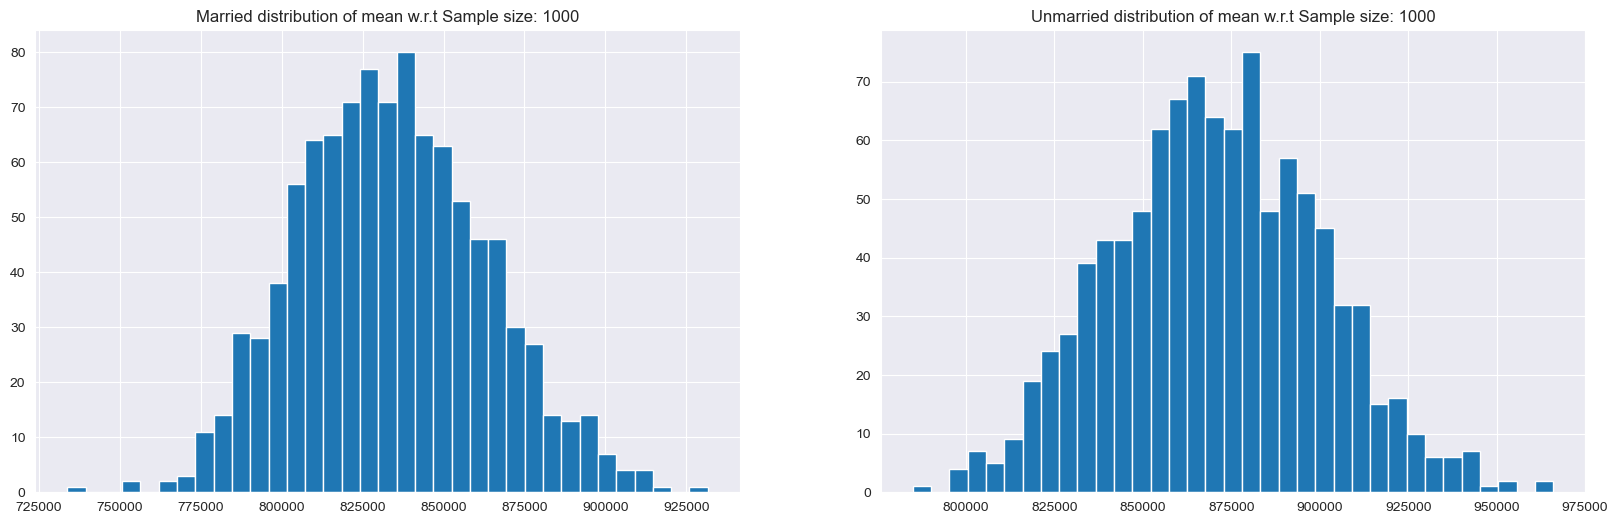

In [71]:
avg_Marital = df_walmart_copy.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_Marital = avg_Marital.reset_index()

avg_single = avg_Marital[avg_Marital['Marital_Status']==0]
avg_married = avg_Marital[avg_Marital['Marital_Status']==1]

sample_size = 1000
num_rep = 1000
married_mean = []
single_mean = []

for i in range(num_rep):
    avg_married1 = avg_Marital[avg_Marital['Marital_Status']==1].sample(sample_size, replace=True)['Purchase'].mean()
    avg_single1 = avg_Marital[avg_Marital['Marital_Status']==0].sample(sample_size, replace=True)['Purchase'].mean()
    
    married_mean.append(avg_married1)
    single_mean.append(avg_single1)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_mean, bins=35)
axis[1].hist(single_mean, bins=35)
axis[0].set_title("Married distribution of mean w.r.t Sample size: 1000")
axis[1].set_title("Unmarried distribution of mean w.r.t Sample size: 1000")

plt.show()

### Observations:

The means sample seems to be normally distributed for both married and singles. Also, mean of the sample means are closer to the population mean as per CLT.

### Calculating 90% confidence interval for avg expenses for married/single for sample size 1000

In [73]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married:- {:.2f}".format(avg_married['Purchase'].mean()))
print("Population avg spend amount for Single:- {:.2f}\n".format(avg_single['Purchase'].mean()))

print("Sample avg spend amount for Married:- {:.2f}".format(np.mean(married_mean)))
print("Sample avg spend amount for Single:- {:.2f}\n".format(np.mean(single_mean)))

print("Sample std for Married:- {:.2f}".format(pd.Series(married_mean).std()))
print("Sample std for Single:- {:.2f}\n".format(pd.Series(single_mean).std()))

print("Sample std error for Married:- {:.2f}".format(pd.Series(married_mean).std()/np.sqrt(1000))) 
print("Sample std error for Single:- {:.2f}\n".format(pd.Series(single_mean).std()/np.sqrt(1000)))

samplemean_married=np.mean(married_mean)
samplemean_single=np.mean(single_mean)

samplestddev_married=pd.Series(married_mean).std()
samplestddev_single=pd.Series(single_mean).std()

samplestderr_married=samplestddev_married/np.sqrt(1000)
samplestderr_single=samplestddev_single/np.sqrt(1000)

Upper_Limit_married=z90*samplestderr_married + samplemean_married
Lower_Limit_married=samplemean_married - z90*samplestderr_married

Upper_Limit_single=z90*samplestderr_single + samplemean_single
Lower_Limit_single=samplemean_single - z90*samplestderr_single

print("CI w.r.t Married: ",[Lower_Limit_married,Upper_Limit_married])
print("CI w.r.t Single: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married:- 832362.91
Population avg spend amount for Single:- 870452.95

Sample avg spend amount for Married:- 834135.64
Sample avg spend amount for Single:- 870541.39

Sample std for Married:- 29029.83
Sample std for Single:- 29584.10

Sample std error for Married:- 918.00
Sample std error for Single:- 935.53

CI w.r.t Married:  [832625.5276937339, 835645.7605062659]
CI w.r.t Single:  [869002.4363267092, 872080.3340832909]


### Observation

Using Confidence interval at 90%, it can be inferred that:

Average amount spend by married customers lie in the range 832625.5 - 835645.7

Average amount spend by single customers lie in range 869002.4 - 872080.3

### Calculating 95% confidence interval for avg expenses for married/single for sample size 1000

In [74]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married:- {:.2f}".format(avg_married['Purchase'].mean()))
print("Population avg spend amount for Single:- {:.2f}\n".format(avg_single['Purchase'].mean()))

print("Sample avg spend amount for Married:- {:.2f}".format(np.mean(married_mean)))
print("Sample avg spend amount for Single:- {:.2f}\n".format(np.mean(single_mean)))

print("Sample std for Married:- {:.2f}".format(pd.Series(married_mean).std()))
print("Sample std for Single:- {:.2f}\n".format(pd.Series(single_mean).std()))

print("Sample std error for Married:- {:.2f}".format(pd.Series(married_mean).std()/np.sqrt(1000))) 
print("Sample std error for Single:- {:.2f}\n".format(pd.Series(single_mean).std()/np.sqrt(1000)))

samplemean_married=np.mean(married_mean)
samplemean_single=np.mean(single_mean)

samplestddev_married=pd.Series(married_mean).std()
samplestddev_single=pd.Series(single_mean).std()

samplestderr_married=samplestddev_married/np.sqrt(1000)
samplestderr_single=samplestddev_single/np.sqrt(1000)

Upper_Limit_married=z95*samplestderr_married + samplemean_married
Lower_Limit_married=samplemean_married - z95*samplestderr_married

Upper_Limit_single=z95*samplestderr_single + samplemean_single
Lower_Limit_single=samplemean_single - z95*samplestderr_single

print("CI w.r.t Married: ",[Lower_Limit_married,Upper_Limit_married])
print("CI w.r.t Single: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married:- 832362.91
Population avg spend amount for Single:- 870452.95

Sample avg spend amount for Married:- 834135.64
Sample avg spend amount for Single:- 870541.39

Sample std for Married:- 29029.83
Sample std for Single:- 29584.10

Sample std error for Married:- 918.00
Sample std error for Single:- 935.53

CI w.r.t Married:  [832336.3564670022, 835934.9317329976]
CI w.r.t Single:  [868707.7439883131, 872375.026421687]


### Observation

Using Confidence interval at 95%, it can be inferred that:

Average amount spend by married customers lie in the range 832336.3 - 835934.9

Average amount spend by single customers lie in range 868707.7 - 872375

### Calculating 99% confidence interval for avg expenses for married/single for sample size 1000

In [75]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married:- {:.2f}".format(avg_married['Purchase'].mean()))
print("Population avg spend amount for Single:- {:.2f}\n".format(avg_single['Purchase'].mean()))

print("Sample avg spend amount for Married:- {:.2f}".format(np.mean(married_mean)))
print("Sample avg spend amount for Single:- {:.2f}\n".format(np.mean(single_mean)))

print("Sample std for Married:- {:.2f}".format(pd.Series(married_mean).std()))
print("Sample std for Single:- {:.2f}\n".format(pd.Series(single_mean).std()))

print("Sample std error for Married:- {:.2f}".format(pd.Series(married_mean).std()/np.sqrt(1000))) 
print("Sample std error for Single:- {:.2f}\n".format(pd.Series(single_mean).std()/np.sqrt(1000)))

samplemean_married=np.mean(married_mean)
samplemean_single=np.mean(single_mean)

samplestddev_married=pd.Series(married_mean).std()
samplestddev_single=pd.Series(single_mean).std()

samplestderr_married=samplestddev_married/np.sqrt(1000)
samplestderr_single=samplestddev_single/np.sqrt(1000)

Upper_Limit_married=z99*samplestderr_married + samplemean_married
Lower_Limit_married=samplemean_married - z99*samplestderr_married

Upper_Limit_single=z99*samplestderr_single + samplemean_single
Lower_Limit_single=samplemean_single - z99*samplestderr_single

print("CI w.r.t Married: ",[Lower_Limit_married,Upper_Limit_married])
print("CI w.r.t Single: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married:- 832362.91
Population avg spend amount for Single:- 870452.95

Sample avg spend amount for Married:- 834135.64
Sample avg spend amount for Single:- 870541.39

Sample std for Married:- 29029.83
Sample std for Single:- 29584.10

Sample std error for Married:- 918.00
Sample std error for Single:- 935.53

CI w.r.t Married:  [831770.86606806, 836500.4221319398]
CI w.r.t Single:  [868131.4567487829, 872951.3136612172]


### Observation

Using Confidence interval at 99%, it can be inferred that:

Average amount spend by married customers lie in the range 831770.8 - 836500.4

Average amount spend by single customers lie in range 868131.4 - 872951.3

For married and singles, it can be infered that with larger sample size the sample mean gets closer to tthe population mean and at greater confidence interval, the range increases.

#### Q5. Results when the same activity is performed for Age?

In [79]:
amt_df = df_walmart_copy.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
#amt_df
#amt_df['Age'].value_counts()

sample_size = 200
num_rep = 1000
all_means = {}
age_bins = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+','0-17']

for age_interval in age_bins:
    all_means[age_interval] = []
for age_interval in age_bins:
    for _ in range(num_rep):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

for val in ['0-17','18-25','26-35','36-45','46-50','51-55','55+']:
    new_df = amt_df[amt_df['Age']==val]
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt
    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 0-17 --> confidence interval of means: (522059.25, 700834.92)
For age 18-25 --> confidence interval of means: (794981.15, 900671.92)
For age 26-35 --> confidence interval of means: (934950.00, 1023406.87)
For age 36-45 --> confidence interval of means: (811759.40, 923447.13)
For age 46-50 --> confidence interval of means: (703017.44, 859465.95)
For age 51-55 --> confidence interval of means: (678580.73, 817795.32)
For age 55+ --> confidence interval of means: (466588.63, 589956.62)


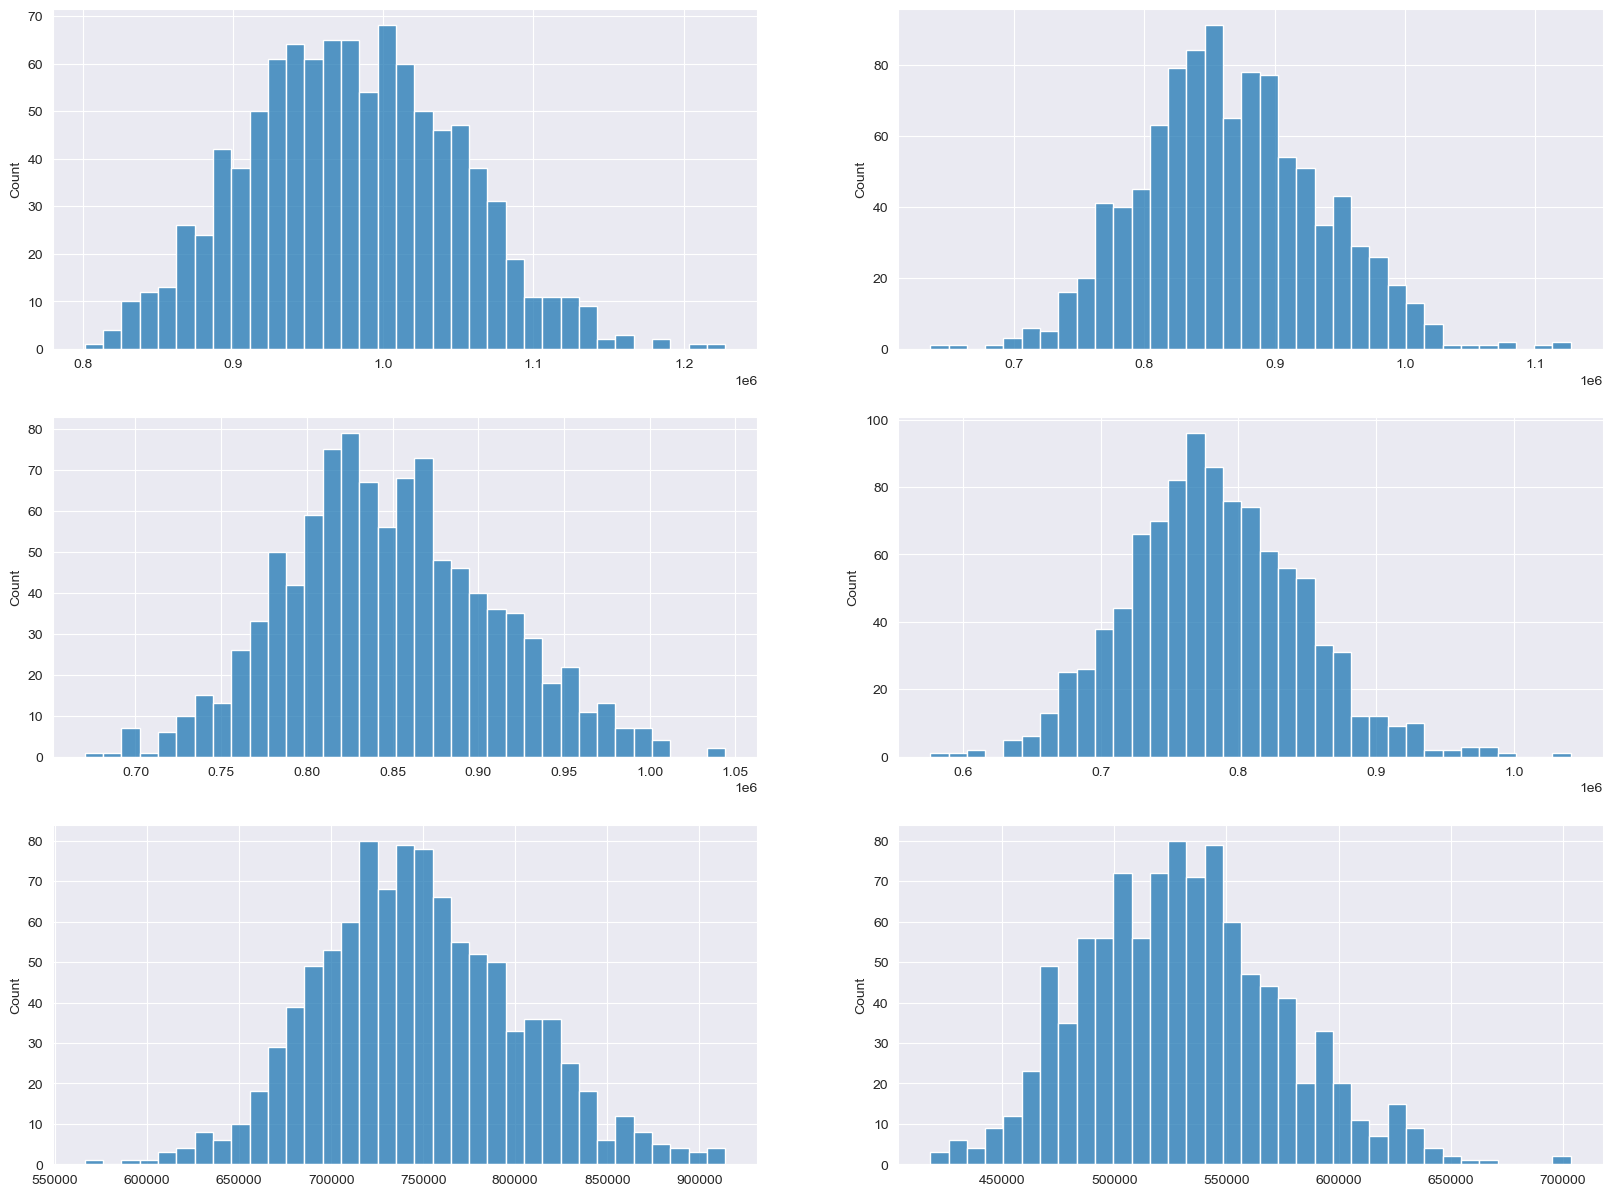

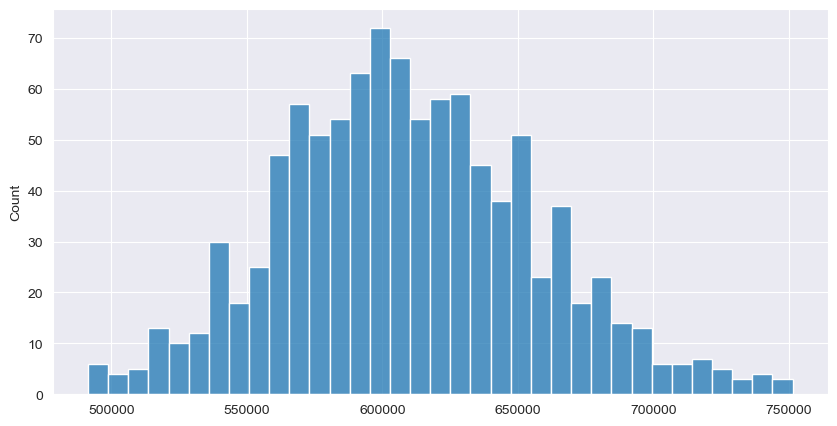

In [89]:
avg_age = df_walmart_copy.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avg_age = avg_age.reset_index()

avg_age['Age'].value_counts()
sample_size = 200
num_rep = 1000

all_sample_mean = {}

age_bins = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_bins:
    all_sample_mean[i] = []
    
for i in age_bins:
    for j in range(num_rep):
        
        mean = avg_age[avg_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_mean[i].append(mean)
               
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_mean['26-35'],bins=35,ax=axis[0,0])
sns.histplot(all_sample_mean['36-45'],bins=35,ax=axis[0,1])
sns.histplot(all_sample_mean['18-25'],bins=35,ax=axis[1,0])
sns.histplot(all_sample_mean['46-50'],bins=35,ax=axis[1,1])
sns.histplot(all_sample_mean['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_mean['55+'],bins=35,ax=axis[2,1])

plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(all_sample_mean['0-17'],bins=35)
plt.show()


### Observations:

The means sample seems to be normally distributed for all age groups. Also, mean of the sample means are closer to the population mean as per CLT.

### Calculating 90% confidence interval for avg expenses for different age groups for sample size 200

In [86]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_rep = 1000

all_population_mean={}
all_sample_mean = {}

age_bins = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_bins:
    all_sample_mean[i] = []
    all_population_mean[i]=[]
    population_mean=avg_age[avg_age['Age']==i]['Purchase'].mean()
    all_population_mean[i].append(population_mean)
    
print("All age group population mean: \n", all_population_mean)
print("\n")
    
for i in age_bins:
    for j in range(num_rep):
        
        mean = avg_age[avg_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_mean[i].append(mean)
        
        
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avg_age[avg_age['Age']==val] 
    
    std_error = z90*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [979178.43497321], '36-45': [867603.264781491], '18-25': [847826.5369504209], '46-50': [781241.6949152543], '51-55': [748188.027027027], '55+': [528272.623655914], '0-17': [611447.0825688073]}


For age 26-35 confidence interval of means: (942058.14, 1016298.73)
For age 36-45 confidence interval of means: (820734.31, 914472.22)
For age 18-25 confidence interval of means: (803474.16, 892178.91)
For age 46-50 confidence interval of means: (715589.19, 846894.19)
For age 51-55 confidence interval of means: (689767.62, 806608.44)
For age 55+ confidence interval of means: (476502.13, 580043.12)
For age 0-17 confidence interval of means: (536425.15, 686469.01)


### Observation

The insights w.r.t CI are displayed as above

### Calculating 95% confidence interval for avg expenses for different age groups for sample size 200

In [90]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_rep = 1000

all_population_mean={}
all_sample_mean = {}

age_bins = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_bins:
    all_sample_mean[i] = []
    all_population_mean[i]=[]
    population_mean=avg_age[avg_age['Age']==i]['Purchase'].mean()
    all_population_mean[i].append(population_mean)
    
print("All age group population mean: \n", all_population_mean)
print("\n")
    
for i in age_bins:
    for j in range(num_rep):
        
        mean = avg_age[avg_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_mean[i].append(mean)
        
        
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avg_age[avg_age['Age']==val] 
    
    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [979178.43497321], '36-45': [867603.264781491], '18-25': [847826.5369504209], '46-50': [781241.6949152543], '51-55': [748188.027027027], '55+': [528272.623655914], '0-17': [611447.0825688073]}


For age 26-35 confidence interval of means: (934950.00, 1023406.87)
For age 36-45 confidence interval of means: (811759.40, 923447.13)
For age 18-25 confidence interval of means: (794981.15, 900671.92)
For age 46-50 confidence interval of means: (703017.44, 859465.95)
For age 51-55 confidence interval of means: (678580.73, 817795.32)
For age 55+ confidence interval of means: (466588.63, 589956.62)
For age 0-17 confidence interval of means: (522059.25, 700834.92)


### Observation

The insights w.r.t CI are displayed as above

### Calculating 99% confidence interval for avg expenses for different age groups for sample size 200

In [88]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_rep = 1000

all_population_mean={}
all_sample_mean = {}

age_bins = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_bins:
    all_sample_mean[i] = []
    all_population_mean[i]=[]
    population_mean=avg_age[avg_age['Age']==i]['Purchase'].mean()
    all_population_mean[i].append(population_mean)
    
print("All age group population mean: \n", all_population_mean)
print("\n")
    
for i in age_bins:
    for j in range(num_rep):
        
        mean = avg_age[avg_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_mean[i].append(mean)
        
        
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avg_age[avg_age['Age']==val] 
    
    std_error = z99*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [979178.43497321], '36-45': [867603.264781491], '18-25': [847826.5369504209], '46-50': [781241.6949152543], '51-55': [748188.027027027], '55+': [528272.623655914], '0-17': [611447.0825688073]}


For age 26-35 confidence interval of means: (921049.63, 1037307.24)
For age 36-45 confidence interval of means: (794208.48, 940998.05)
For age 18-25 confidence interval of means: (778372.60, 917280.47)
For age 46-50 confidence interval of means: (678432.67, 884050.72)
For age 51-55 confidence interval of means: (656704.15, 839671.90)
For age 55+ confidence interval of means: (447202.23, 609343.01)
For age 0-17 confidence interval of means: (493965.93, 728928.24)


### Observation

We can see the sample means are closer to the population mean for the differnt age groups. And, with greater confidence interval we have the upper limit and lower limit range increases. As we have seen for gender and marital status, by increasing the sample size we can have the mean of the sample means closer to the population.

### Question:

1.Are women spending more money per transaction than men? Why or Why not?

Ans: No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women). 

The reason for less purchase by women could have several factors:

  Males might be doing the purchase for females.
  Salary can be a factor in less purchase.
  We also need to see whether male-based products were sold more than women-based products to clearly identify difference in spending pattern.
  If the female based products quality/quantity needs to be improved for women purchasing.

2. Confidence intervals and distribution of the mean of the expenses by female and male customers.

At 99% Confidence Interval with sample size 1000

Average amount spend by male customers lie in the range 9,22,011.28 - 9,27,154.61

Average amount spend by female customers lie in range 7,09,678.88 - 7,13,811.31


3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

Ans: No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.

4. Results when the same activity is performed for Married vs Unmarried

At 99% Confidence Interval with sample size 1000

Average amount spend by married customers lie in the range:  [841059.6309378392, 845078.140167503]
Average amount spend by unmarried customers lie in the range:  [879093.3492016713, 884078.6782803286]

5. Results when the same activity is performed for Age

At 99% Confidence Interval with sample size 200

For age 26-35 confidence interval of means: (931009.46,1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)

### Insights

1. ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)

2. 75% of the users are Male and 25% are Female

3. 60% Single, 40% Married

4. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years

5. Total of 20 product categories are there

6. There are 20 differnent types of occupations in the city

7. Most of the users are Male

8. There are 20 different types of Occupation and Product_Category

9. More users belong to B City_Category

10. More users are Single as compare to Married

11. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency

12. Average amount spend by Male customers: 913870.84

13. Average amount spend by Female customers: 703781.06

14. Confidence Interval by Gender Now using the Central Limit Theorem for the population:

Population avg spend amount for Male:- 913870.84
Population avg spend amount for Female:- 703781.06
Now we can infer about the population that, 95% of the times:
CI w.r.t Male:-  [910949.9420226932, 914170.9019826403]
CI w.r.t Female:-  [702362.2213282012, 704927.6752637988]


15. Confidence Interval by Marital Status Now using the Central Limit Theorem for the population:

Population avg spend amount for Male:- 913870.84
Population avg spend amount for Female:- 703781.06
Now we can infer about the population that, 95% of the times:
CI w.r.t Married:  [832336.3564670022, 835934.9317329976]
CI w.r.t Single:  [868707.7439883131, 872375.026421687]

16. Confidence Interval by Age:

For age 26-35 confidence interval of means: (934950.00, 1023406.87)
For age 36-45 confidence interval of means: (811759.40, 923447.13)
For age 18-25 confidence interval of means: (794981.15, 900671.92)
For age 46-50 confidence interval of means: (703017.44, 859465.95)
For age 51-55 confidence interval of means: (678580.73, 817795.32)
For age 55+ confidence interval of means: (466588.63, 589956.62)
For age 0-17 confidence interval of means: (522059.25, 700834.92)

## Recommendations

In [ ]:
1. Gender-Based Targeting:
Men tend to spend more than women, indicating a potential opportunity to retain and attract male customers. The company can focus on strategies to engage and retain its male customer base while also aiming to attract more male customers.

2. High-Demand Product Categories:
Product categories 1, 5, and 8 exhibit the highest purchasing frequency, indicating strong demand for products in these categories. The company can capitalize on this demand by expanding its offerings in these categories and ensuring a sufficient supply to meet customer needs.

3. Targeting Unmarried Customers:
Unmarried customers demonstrate higher spending compared to married customers. To drive growth, the company should prioritize efforts to acquire and engage unmarried customers.

4. Age-Targeted Marketing:
Customers aged 26-35 exhibit higher spending than other age groups. Focusing on acquiring and retaining customers within this age range can be a strategic approach for the company.

5. City-Specific Strategies:
The majority of customers aged 26-35 are located in City Categories B and A. The company can intensify its marketing efforts and product offerings in these cities to tap into this customer demographic and boost business.

6. City_Category C Male Customers:
Male customers residing in City Category C tend to spend more than their counterparts in City Categories B or A. The company can enhance its product selection and marketing strategies specifically for City Category C to maximize revenue.

7. Product Category Evaluation:
Product categories 19, 20, and 13 have lower purchase rates. The company should consider evaluating the performance of these categories and potentially make informed decisions about their retention or discontinuation.

8. VIP Customer Recognition:
Identify and reward the top 10 customers who have made substantial purchases. Offering exclusive offers and discounts to these valued customers can enhance customer loyalty and benefit the company's business.

9. Financial Partnerships:
Collaborate with financial partners to offer credit cards and other benefits to customers associated with the most significant contributing occupations. This strategic partnership can drive sales and customer engagement.

10. Quality Assurance for Top Products:
Focus on maintaining and improving the quality of the top-selling products to sustain customer satisfaction and further boost sales in these product categories.

11. Year-Long City Residents:
Customers who have resided in the city for an extended period, contributing to 35% of total purchases, represent a valuable customer base. The company can tailor marketing efforts to engage with these customers, who are neither new nor long-established residents.

12. Mid-Range Product Focus:
The highest frequency of purchase orders falls within the 5k to 10k range. To enhance sales, the company can concentrate more on offering and promoting mid-range products that resonate with customers preferences in this price range.

13. Customer Feedback Integration:
Implement a system to collect and analyze customer feedback to identify areas for improvement in products, services, and overall shopping experience. Use this feedback to make data-driven enhancements.

14. Personalized Recommendations:
Utilize customer purchase history and browsing behavior to offer personalized product recommendations. Personalization can enhance customer engagement and drive additional sales.

15. Multi-Channel Shopping Experience:
Enhance the integration of online and offline shopping experiences, allowing customers to seamlessly transition between physical stores and e-commerce platforms. This can provide convenience and flexibility to shoppers.

16. Customer Education and Engagement:
Develop educational resources and engage customers through content marketing. Providing value through informative content can build trust and encourage repeat business.

17. Ethical and Sustainable Products:
Consider offering and promoting ethical and sustainable product options. An increasing number of consumers are conscious of their purchases' environmental and ethical impacts.

18. Dynamic Pricing Strategies:
Implement dynamic pricing strategies that adjust prices in real-time based on demand, time of day, and other factors. This can optimize revenue and cater to price-sensitive customers.

19. Customer Retention Programs:
Create customer loyalty and retention programs that reward frequent shoppers with exclusive benefits, discounts, and incentives. These programs can foster long-term customer relationships.

20. Market Expansion Analysis:
Evaluate opportunities for expanding into new markets or regions based on the dataset's geographical information. Entering new markets can diversify the customer base and increase revenue.

21. Inventory Optimization:
Utilize data-driven forecasting models to optimize inventory management. Maintaining the right levels of stock can prevent stockouts and reduce carrying costs.

22. Social Media Engagement:
Strengthen the company's presence on social media platforms to engage with customers, address inquiries, and promote products. Social media can be a valuable channel for building brand loyalty.

23. Competitive Pricing Analysis:
Continuously monitor and analyze competitors' pricing strategies to ensure competitiveness. Adjust pricing strategies as needed to remain competitive in the market.

24. Customer Retention Analytics:
Use data analytics to identify factors that contribute to customer retention. Understand why some customers continue to shop with the company, and leverage these insights to retain others.

25. Quality Control:
Maintain strict quality control standards for products to ensure consistent quality and reduce returns or customer dissatisfaction.

26. Employee Training and Satisfaction:
Invest in employee training and job satisfaction initiatives. Satisfied employees are more likely to provide excellent customer service, which can impact customer loyalty.

27. Mobile Shopping Optimization:
Optimize the mobile shopping experience by ensuring the company's website and apps are user-friendly and responsive on various mobile devices.

28. Data Security and Privacy:
Prioritize data security and customer privacy to build trust. Clearly communicate the company's commitment to protecting customer data.

29. Community Engagement:
Engage with the local community through sponsorships, events, or charitable activities. Building strong community ties can enhance the company's reputation and customer loyalty.

-----EOF-----